<a href="https://colab.research.google.com/github/shourjya19b/Macroeconomic-Time-Series-Analysis/blob/main/Macroeconomic_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series forecast of India's Export using various models
- ARIMA, SARIMA models (Presentation 1)
- LSTM & SARIMAX model with exogenous variables (Presentation 2)

Group 4 :
- Abhisek Sinha
- Anish Nandi
- Chaithanya Unnikrishnan
- Sebastian P S
- Shourjya
- Treasa Rejo

## Problem Statement :

Time series forecasting and model evaluation of ARIMA & SARIMA for Indian exports and imports based on the EPWRF India time series - export data set from time period of 1997 to 2022.By forecasting the export and import of India in the upcoming years, Banks can prepare for foreign exchange reserves, companies can identify areas of growth in exports, potential reduction in imports by facilitating value addition within the country, etc.

This time series analysis is a sample use case of how forecasting can be used to solve several business use cases including forecasting demand, sales, investment & Stock market, commodity prices, demography & population, etc


## Export Dataset: EPWRF India Time Series (https://epwrfits-in.eu1.proxy.openathens.net/Main_screen.aspx?userfeedback=true)

## Presentation 1: Solution Approach

The following steps have been used in arriving at a good model for forecasting the exports for India for the next decade:
- Cleaning the dataset and handling missing values
- Exploratory data analysis for timeseries properties
- Checking for stationarity
- De-seasonalize by applying smoothing techniques
- ARIMA Model: Parameter selection
- ARIMA Model: Forecasting
- ARIMA Model: Model Evaluation & Accuracy
- SARIMA Model: Parameter selection
- SARIMA Model: Forecasting
- SARIMA Model: Model Evaluation & Accuracy
- Model Selection for forecast

### Importing the dataset

The data has already been checked for missing values. The values have been handled using backward fill in excel.

In [ ]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


IEts = pd.read_excel('Import_Export_Monthly.xlsx',sheet_name="Cleaned", parse_dates=['Year'])
IEts.head()

Year  Exports_Total  Exports_Oil  Exports_NonOil  Imports_Total  \
0 1997-04-01           9437          161            9276          11388   
1 1997-05-01          10904          196           10709          12547   
2 1997-06-01          10116           80           10035          11984   
3 1997-07-01          10677          123           10554          12699   
4 1997-08-01          10125          146            9979          10991   

   Imports_Oil  Imports_NonOil Unnamed: 7  
0         2585            8803        NaN  
1         2653            9894        NaN  
2         2539            9444        NaN  
3         2289           10410        NaN  
4         2499            8492        NaN

In [ ]:
df=IEts[["Year","Exports_Total"]]
df.head()
x= df["Year"]
y= df["Exports_Total"]

In [ ]:
df

Year  Exports_Total
0   1997-04-01           9437
1   1997-05-01          10904
2   1997-06-01          10116
3   1997-07-01          10677
4   1997-08-01          10125
..         ...            ...
308 2022-12-01         284311
309 2023-01-01         269561
310 2023-02-01         279856
311 2023-03-01         315833
312 2023-04-01         284299

[313 rows x 2 columns]

### Plotting the TimeSeries

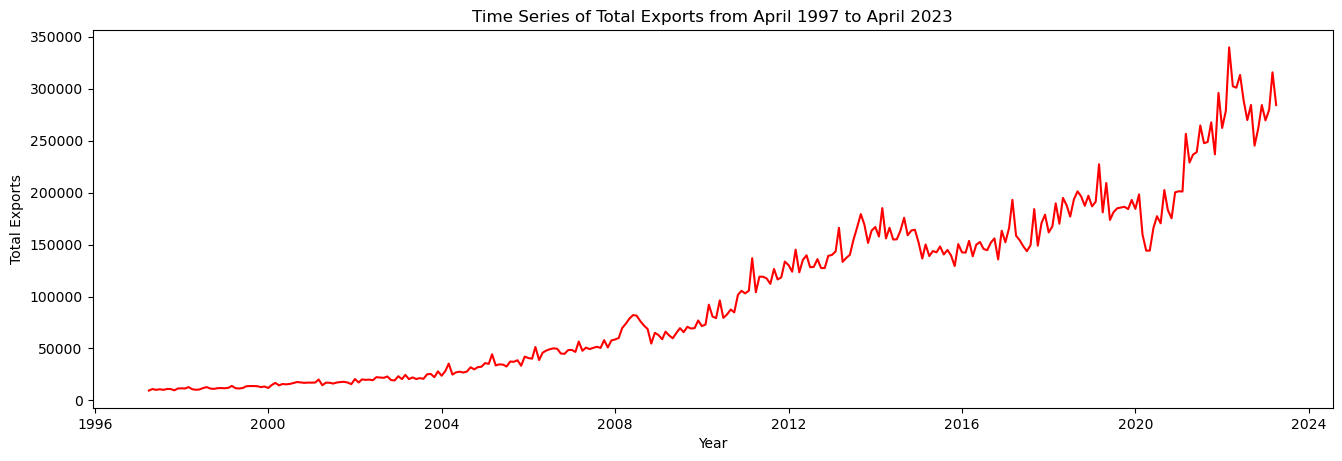

In [ ]:
plt.figure(figsize=(16,5),dpi=100)
plt.plot(x,y,color="red")
plt.gca().set(title="Time Series of Total Exports from April 1997 to April 2023",xlabel="Year",ylabel="Total Exports")
plt.show()

### Additive and Multiplicative Decomposition of timeseries

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
df.set_index('Year', inplace=True)

Year
1997-04-01   NaN
1997-05-01   NaN
1997-06-01   NaN
1997-07-01   NaN
1997-08-01   NaN
              ..
2022-12-01   NaN
2023-01-01   NaN
2023-02-01   NaN
2023-03-01   NaN
2023-04-01   NaN
Name: trend, Length: 313, dtype: float64


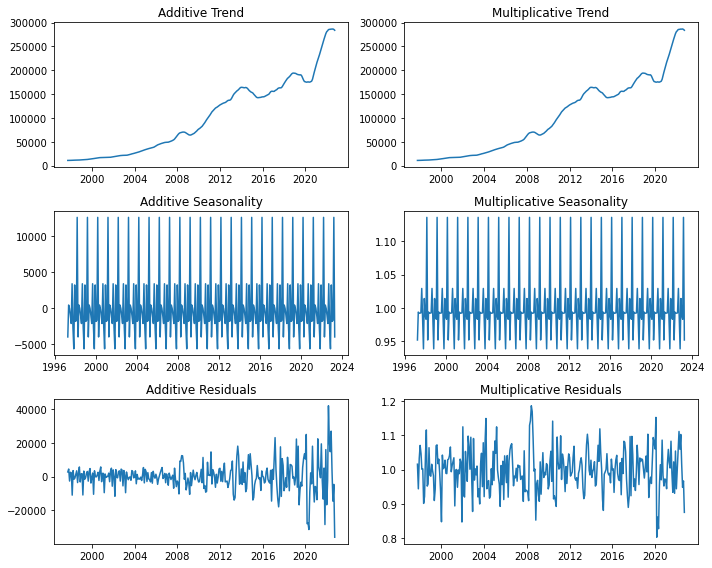

In [ ]:
# Perform additive decomposition
result_additive = seasonal_decompose(df['Exports_Total'], model='additive')

# Perform multiplicative decomposition
result_multiplicative = seasonal_decompose(df['Exports_Total'], model='multiplicative')

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Additive decomposition plot
axes[0, 0].plot(result_additive.trend)
axes[0, 0].set_title('Additive Trend')

axes[1, 0].plot(result_additive.seasonal)
axes[1, 0].set_title('Additive Seasonality')

axes[2, 0].plot(result_additive.resid)
axes[2, 0].set_title('Additive Residuals')

# Multiplicative decomposition plot
print(result_multiplicative.trend)
axes[0, 1].plot(result_multiplicative.trend)
axes[0, 1].set_title('Multiplicative Trend')

axes[1, 1].plot(result_multiplicative.seasonal)
axes[1, 1].set_title('Multiplicative Seasonality')

axes[2, 1].plot(result_multiplicative.resid)
axes[2, 1].set_title('Multiplicative Residuals')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_reconstructed = pd.concat([result_multiplicative.seasonal, result_multiplicative.trend, result_multiplicative.resid, result_multiplicative.observed], axis=1)
df_reconstructed.columns = ['Seasonal', 'Trend', 'Residuals', 'ActualValues']
df_reconstructed.head(20)

Seasonal         Trend  Residuals  ActualValues
Year                                                       
1997-04-01  0.952046           NaN        NaN        9437.0
1997-05-01  0.993877           NaN        NaN       10904.0
1997-06-01  0.992108           NaN        NaN       10116.0
1997-07-01  0.992394           NaN        NaN       10677.0
1997-08-01  0.992672           NaN        NaN       10125.0
1997-09-01  1.029335           NaN        NaN       10955.0
1997-10-01  0.986535  10897.083333   1.015780       10920.0
1997-11-01  0.938798  10922.541667   0.944016        9680.0
1997-12-01  1.014246  10908.666667   1.032441       11423.0
1998-01-01  0.988841  10972.291667   1.070614       11616.0
1998-02-01  0.983177  11129.958333   1.046175       11448.0
1998-03-01  1.135971  11257.083333   1.001039       12801.0
1998-04-01  0.952046  11279.458333   1.002275       10763.0
1998-05-01  0.993877  11371.333333   0.901546       10189.0
1998-06-01  0.992108  11476.083333   0.922049       10498.0
1998-07-01  0.992394  11495.916667   1.036246       11822.0
1998-08-01  0.992672  11525.583333   1.115625       12764.0
1998-09-01  1.029335  11599.875000   0.951997       11367.0
1998-10-01  0.986535  11684.583333   0.958164       11045.0
1998-11-01  0.938798  11774.541667   1.063876       11760.0

### Checking for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df["Exports_Total"].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: 0.37706851982452927
p-value: 0.9806168339088803
Critial Values:
   1%, -3.4524113009049935
Critial Values:
   5%, -2.8712554127251764
Critial Values:
   10%, -2.571946570731871


Null hypothesis: Time series is not stationary

Alternate hypothesis: Time series is stationary


P-value >0.05 => Hence accept null hypothesis ie the timeseries is not stationary

In [ ]:
# KPSS Test
result = kpss(df["Exports_Total"].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 2.549484
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Null hypothesis:Time series is stationary

Alternate hypothesis:Time series is not stationary


P-value <0.05 => Hence reject null hypothesis ie time series is not trend stationary

Since both Dickey fuller and KPSS test conclude that the timeseries is not stationary, differencing must be performed to make it stationary.

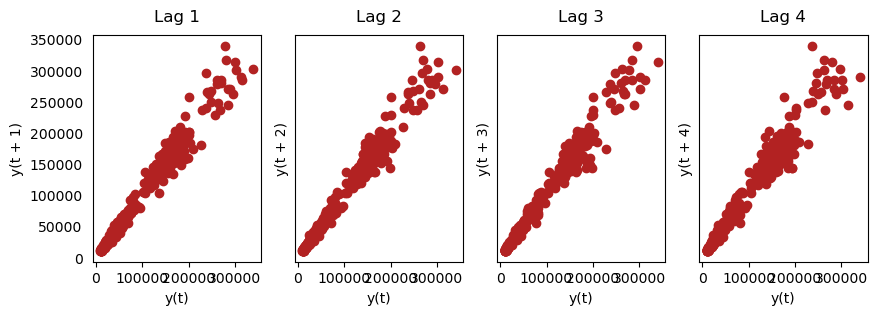

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df["Exports_Total"], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

As seen, high correlation exists between the dataset & previous lag

#### First differencing & checking stationarity

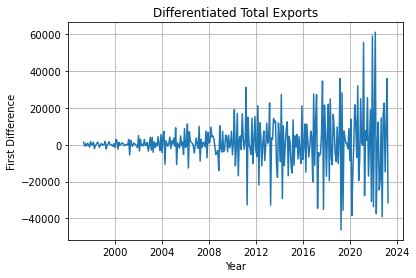

In [ ]:
# Calculate the first difference


df_diff = df.diff().dropna()

# Plot the differentiated data
plt.plot(df_diff.index, df_diff['Exports_Total'])
plt.xlabel('Year')
plt.ylabel('First Difference')
plt.title('Differentiated Total Exports')
plt.grid(True)
plt.show()

In [ ]:
result = adfuller(df_diff["Exports_Total"].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -4.0147456349310415
p-value: 0.0013352368074200111
Critial Values:
   1%, -3.4524113009049935
Critial Values:
   5%, -2.8712554127251764
Critial Values:
   10%, -2.571946570731871


Null hypothesis: Time series is not stationary

Alternate hypothesis: Time series is stationary


P-value <0.05 => Hence reject null hypothesis ie the first differentiated time series is stationary

In [ ]:
# KPSS Test
result = kpss(df_diff["Exports_Total"].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.192302
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Null hypothesis:Time series is stationary

Alternate hypothesis:Time series is not stationary

P-value <0.05 => Hence accept null hypothesis ie the first differentiated time series is trend stationary

Hence factor of d to be included in the ARIMA model is 1.

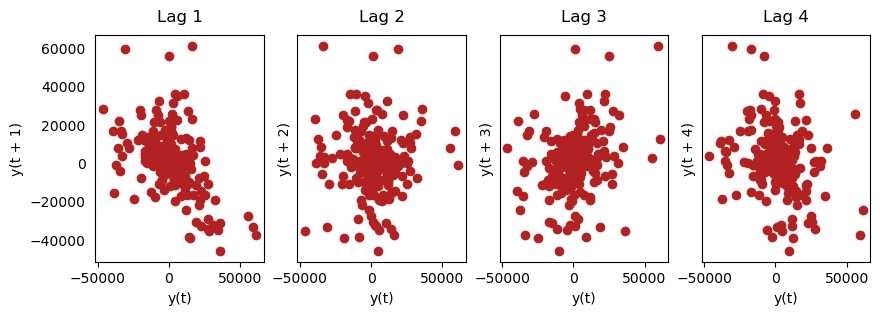

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_diff["Exports_Total"], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

As seen, the auto correlation disappears once the first differentiation is performed.

### Smoothening the Dataset

As the ARIMA model can be used only for non seasonal data, seasonality here is smoothened using MA with period 12.

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})
# 1. Moving Average
df_ma = pd.DataFrame(df["Exports_Total"].rolling(12, center=True, closed='both').mean())


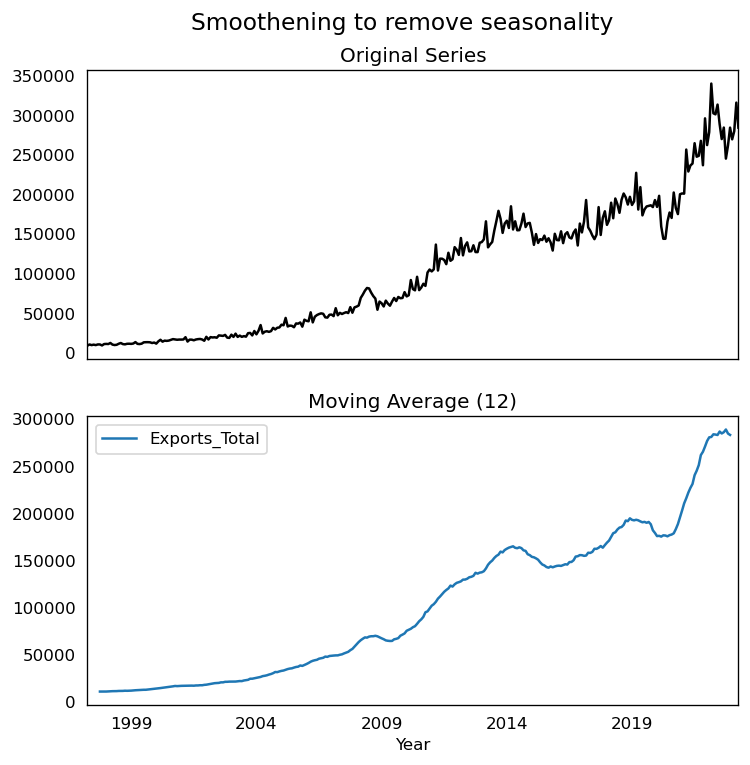

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(7, 7), sharex=True, dpi=120)
df['Exports_Total'].plot(ax=axes[0], color='k', title='Original Series')
df_ma.plot(ax=axes[1], title='Moving Average (12)')
fig.suptitle('Smoothening to remove seasonality', y=0.95, fontsize=14)
plt.show()

## Model 1: ARIMA model

### Parameter selection

### d - difference component

d is determined earlier as 1 as first difference converts non-stationary data into stationary

### p - autoregressor component

C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


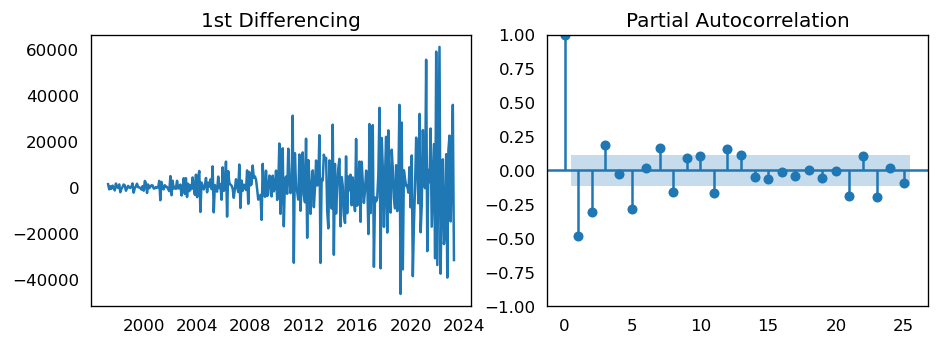

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df_diff["Exports_Total"]); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_diff["Exports_Total"].dropna(), ax=axes[1])

plt.show()

From the PACF graph, we see that the max no of lags that are significant is 2 after which the autocorrelation significantly drops, hence we  determine p (AR) to be 2

### q - Moving average component

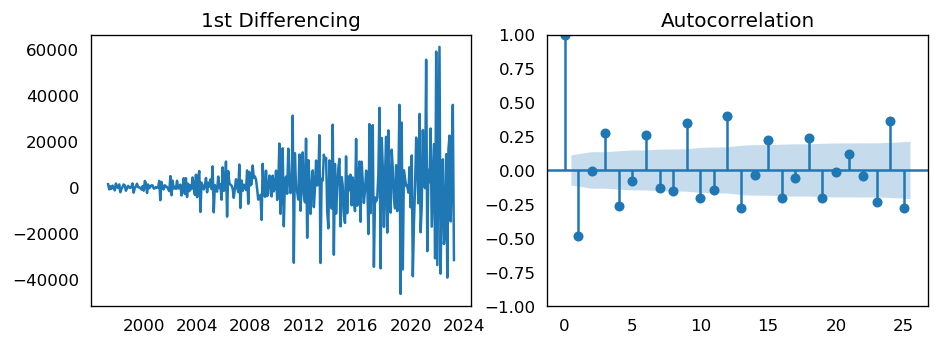

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df_diff["Exports_Total"]); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_diff["Exports_Total"], ax=axes[1])

plt.show()

From the ACF graph, we see that the max no of lags that are significant is 1 after which the autocorrelation significantly drops, hence we  determine p (AR) to be 1

### ARIMA model for forecasting

Since ARIMA model cannot be used on the timeseries with seasonality, we use it on the smoothened timeseries with period 12.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 2,1,1 ARIMA Model
ARIMA1 = ARIMA(df_ma["Exports_Total"], order=(2,1,1))
ARIMA1_fit = ARIMA1.fit()
print(ARIMA1_fit.summary())

C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:          Exports_Total   No. Observations:                  313
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2608.682
Date:                Wed, 31 May 2023   AIC                           5225.363
Time:                        22:02:34   BIC                           5240.335
Sample:                    04-01-1997   HQIC                          5231.347
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6419      0.083      7.739      0.000       0.479       0.804
ar.L2          0.2806      0.077      3.659      0.000       0.130       0.431
ma.L1         -0.3707      0.078     -4.771      0.0

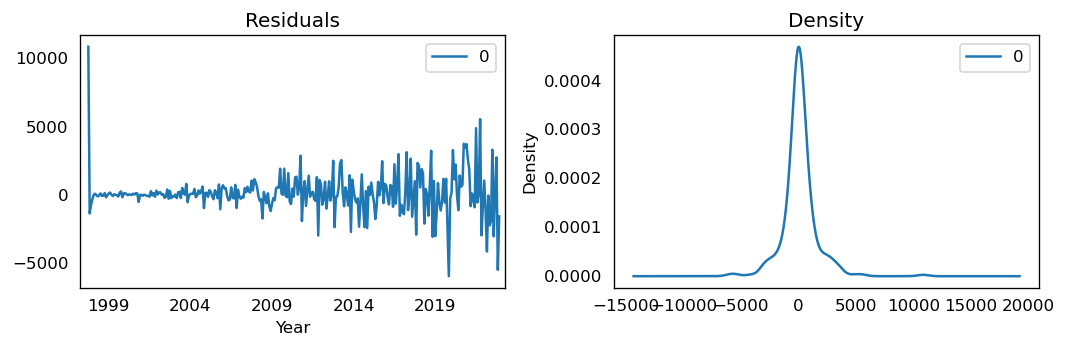

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(ARIMA1_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()
plt.show()

### ARIMA forecasting

In [ ]:
from statsmodels.tsa.stattools import acf
# Split the data into a training set and a test set
train_size = int(len(df_ma) * 0.85)
train = df_ma.iloc[:train_size]
test = df_ma.iloc[train_size:]


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


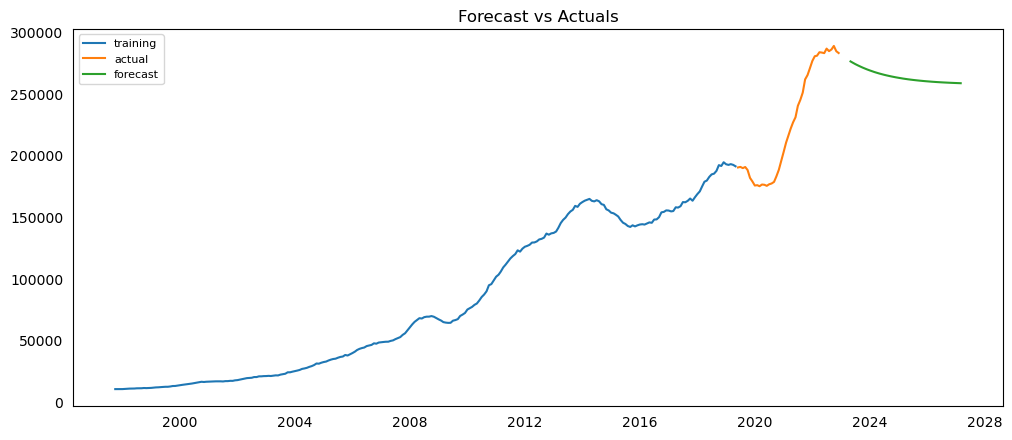

In [ ]:
ARIMA1 = ARIMA(df_ma["Exports_Total"], order=(2,1,1))
ARIMA1_fit = ARIMA1.fit()

# Make predictions
fc = ARIMA1_fit.forecast(len(test),alpha=0.05)
#print(fc,test)
# Make as pandas series
fc_series = pd.Series(fc)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train["Exports_Total"], label='training')
plt.plot(test["Exports_Total"], label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### ARIMA fitting & accuracy

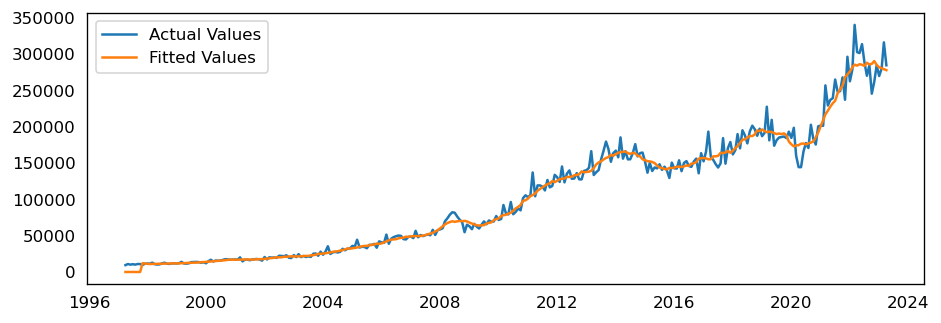

In [ ]:
actual_values = df["Exports_Total"]
fitted_values = ARIMA1_fit.predict()

# Plot the actual and fitted values
plt.plot(actual_values, label='Actual Values')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
actual=np.array(actual_values)
forecast=np.array(fitted_values)

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast, actual)


{'mape': 0.08130276258744201,
 'me': -1215.5568471643762,
 'mae': 6355.37409213501,
 'mpe': -0.026368381594522747,
 'rmse': 10273.592477702954,
 'acf1': 0.09500653511091493,
 'corr': 0.9920727325437867,
 'minmax': 0.07888366430463067}

## Model 2: SARIMA model

Since the ARIMA model cannot handle seasonality, we will also build another model with SARIMA which has seasonal differencing to account for seasonality.

### SARIMA model for forecasting

In [ ]:
import statsmodels.api as sm
SARIMAX1=sm.tsa.statespace.SARIMAX(df['Exports_Total'],order=(2, 1, 1),seasonal_order=(2,1,1,12))
SARIMAX1_fit=model.fit()
print(SARIMAX1_fit.summary())


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                      Exports_Total   No. Observations:                  313
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -3204.646
Date:                            Wed, 31 May 2023   AIC                           6423.292
Time:                                    22:31:10   BIC                           6449.218
Sample:                                04-01-1997   HQIC                          6433.667
                                     - 04-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2979      0.139     -9.357      0.000      -1.570      -1.026
ar.L2         -0.4289      0.069   

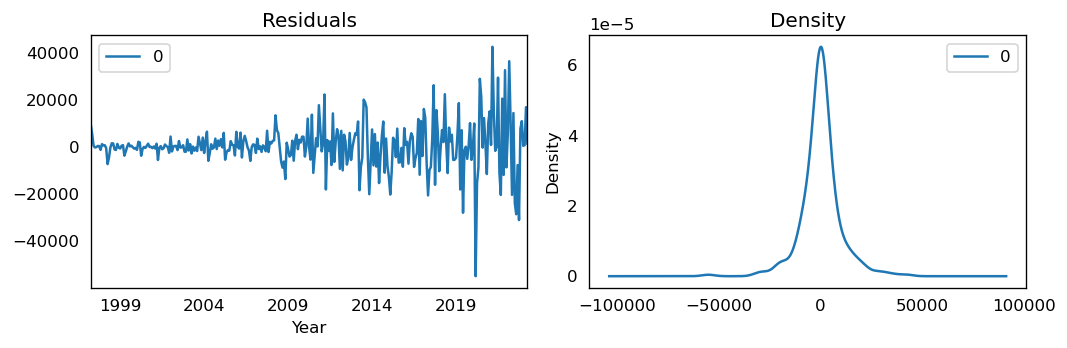

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(SARIMAX1_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
# Split the data into a training set and a test set
train_size = int(len(df) * 0.85)
train1 = df.iloc[:train_size]
test1 = df.iloc[train_size:]


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


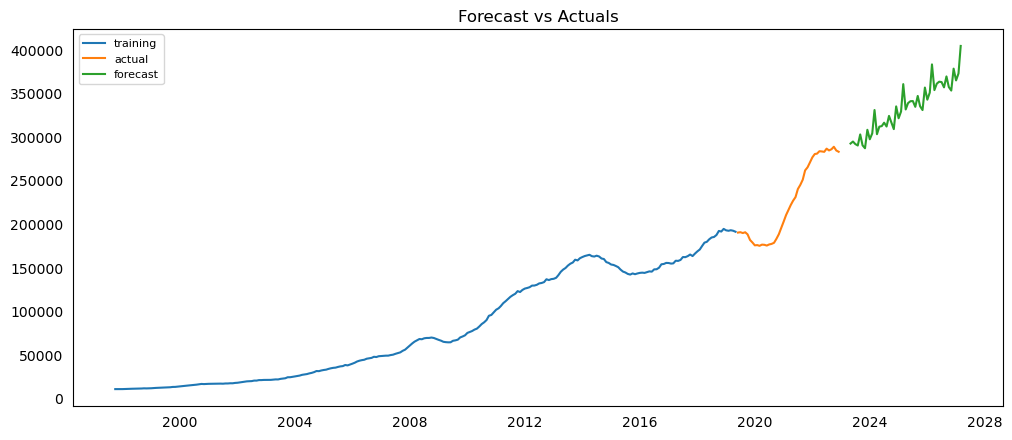

In [ ]:
SARIMAX1=sm.tsa.statespace.SARIMAX(df['Exports_Total'],order=(2, 1, 1),seasonal_order=(2,1,1,12))
SARIMAX1_fit=model.fit()

# Make predictions
fc1 = SARIMAX1_fit.forecast(len(test1),alpha=0.05)
#print(fc,test)
# Make as pandas series
fc1_series = pd.Series(fc1)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train["Exports_Total"], label='training')
plt.plot(test["Exports_Total"], label='actual')
plt.plot(fc1_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### SARIMA fitting & accuracy

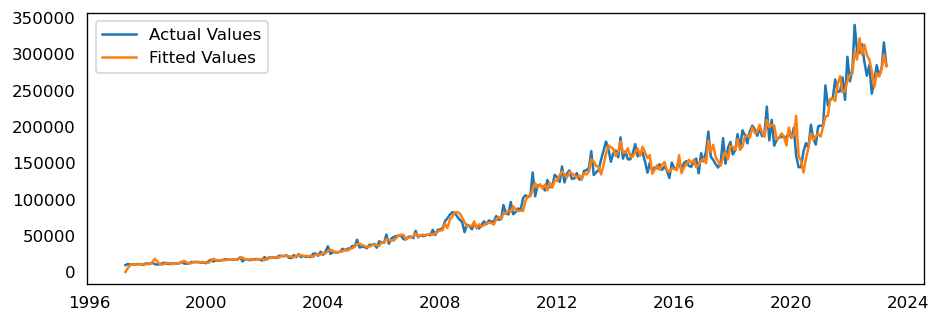

In [ ]:
actual_values1 = df["Exports_Total"]
fitted_values1 = SARIMAX1_fit.predict()

# Plot the actual and fitted values
plt.plot(actual_values1, label='Actual Values')
plt.plot(fitted_values1, label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
actual1=np.array(actual_values1)
forecast1=np.array(fitted_values1)

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast1, actual1)




{'mape': 0.070590252576792,
 'me': -386.80962055186006,
 'mae': 6085.752777823705,
 'mpe': -0.00022204506649700347,
 'rmse': 9654.264952286327,
 'acf1': -0.00028345333258037613,
 'corr': 0.9929012445349635,
 'minmax': 0.06586473277112936}

#### As seen from the model, SARIMA(2,1,1,12) is the better model to forecast exports of India for the next decade with an accuracy of 93% in comparison to 92% of ARIMA

## Presentation 2: Solution Approach

The following steps have been used in arriving at a good model for forecasting the exports for India for the next decade:
- Cleaning the dataset and handling missing values
- Importing exogenous varialbes for GDP, interest rates and dollar exchange rates
- clean the exogenous variables
- Fit SARIMAX model with GDP as exogenous variable
- Forecast and evaluate performance
- Fit SARIMAX model with interest rates as exogenous variable
- Forecast and evaluate performance
- Fit SARIMAX model with dollar exchange rates as exogenous variable
- Forecast and evaluate performance
- LSTM model
- LSTM Model building
- LSTM model comparison with actual
- LSTM model performance evaulation

## Model 3: SARIMAX model with GDP as exogenous variable

### Exogenous variable 1-GDP Dataset: EPWRF India Time Series (https://epwrfits-in.eu1.proxy.openathens.net/Main_screen.aspx?userfeedback=true)

### Importing exogenous variable - GDP

In [ ]:
GDP = pd.read_excel('GDP_dataset.xlsx',sheet_name="GDP_dataset", parse_dates=['Year'])
GDP.head()

Year   India GDP  ANDAMAN AND NICOBAR ISLANDS \n(SDP in lakh)  \
0 1997-01-01  3272947.36                                     150873.0   
1 1998-01-01  3460353.59                                     140518.0   
2 1999-01-01  3657168.43                                     152207.0   
3 2000-01-01  3713783.35                                     151928.0   
4 2001-01-01  3876149.11                                     156412.0   

   ANDHRA PRADESH \n(SDP in lakh)  ARUNACHAL PRADESH \n(SDP in lakh)  \
0                      14384733.0                           426024.0   
1                      16133487.0                           439257.0   
2                      16872904.0                           457081.0   
3                      18250390.0                           489436.0   
4                      19019814.0                           566218.0   

   ASSAM \n(SDP in lakh)  BIHAR \n(SDP in lakh)  CHANDIGARH \n(SDP in lakh)  \
0              7800885.0              9126265.0                    598354.0   
1              7783882.0              9818869.0                    651070.0   
2              8031509.0             10180124.0                    693889.0   
3              8234836.0             11813225.0                    778734.0   
4              8448487.0             11254027.0                    845875.0   

   CHHATTISGARH \n(SDP in lakh)  DELHI \n(SDP in lakh)  ...  \
0                     6512528.0             11991441.0  ...   
1                     6860384.0             12571111.0  ...   
2                     6877154.0             13173808.0  ...   
3                     6521713.0             13742683.0  ...   
4                     7382370.0             14273940.0  ...   

   PUDUCHERRY \n(SDP in lakh)  PUNJAB \n(SDP in lakh)  \
0                    589566.0              12133069.0   
1                    663039.0              12811386.0   
2                    682314.0              13533057.0   
3                    774472.0              14065250.0   
4                    830015.0              14335869.0   

   RAJASTHAN \n(SDP in lakh)  SIKKIM \n(SDP in lakh)  \
0                 18324442.0                228639.0   
1                 19061385.0                244732.0   
2                 19464169.0                253009.0   
3                 19073541.0                272231.0   
4                 21146367.0                293815.0   

   TAMIL NADU \n(SDP in lakh)  TELANGANA \n(SDP in lakh)  \
0                  27289423.0                        NaN   
1                  28579779.0                        NaN   
2                  30326441.0                        NaN   
3                  32107270.0                        NaN   
4                  31604903.0                        NaN   

   TRIPURA \n(SDP in lakh)  UTTAR PRADESH \n(SDP in lakh)  \
0                 640050.0                     34656564.0   
1                 703237.0                     35610518.0   
2                 753275.0                     37567058.0   
3                 797524.0                     38390072.0   
4                 909862.0                     39223984.0   

   UTTARAKHAND \n(SDP in lakh)  WEST BENGAL \n(SDP in lakh)  
0                    2898271.0                   22500097.0  
1                    2946411.0                   23930367.0  
2                    2970810.0                   25576886.0  
3                    3328624.0                   26558900.0  
4                    3512601.0                   28503689.0  

[5 rows x 35 columns]

In [ ]:
df_gdp=GDP[["Year","India GDP"]]
df_gdp.head()

df_gdp

Year    India GDP
0  1997-01-01   3272947.36
1  1998-01-01   3460353.59
2  1999-01-01   3657168.43
3  2000-01-01   3713783.35
4  2001-01-01   3876149.11
5  2002-01-01   4023500.62
6  2003-01-01   4359621.74
7  2004-01-01   4873134.80
8  2005-01-01   5314069.81
9  2006-01-01   5887596.36
10 2007-01-01   6436700.44
11 2008-01-01   6867418.54
12 2009-01-01   7401868.95
13 2010-01-01   8128093.29
14 2011-01-01   8631488.68
15 2012-01-01   9129364.49
16 2013-01-01   9723718.61
17 2014-01-01  10304870.33
18 2015-01-01  11186824.14
19 2016-01-01  12223249.68
20 2017-01-01  13066611.36
21 2018-01-01  13888077.55
22 2019-01-01  14542971.07
23 2020-01-01  14042510.64
24 2021-01-01  10322440.72
25 2022-01-01  14926584.85

In [ ]:
df_new = pd.merge(
    left = df,
    right = df_gdp,
    on = 'Year',
    how = 'outer'
).sort_values(by = 'Year', ascending=True)

df_new

Year  Exports_Total   India GDP
313 1997-01-01            NaN  3272947.36
0   1997-04-01         9437.0         NaN
1   1997-05-01        10904.0         NaN
2   1997-06-01        10116.0         NaN
3   1997-07-01        10677.0         NaN
..         ...            ...         ...
308 2022-12-01       284311.0         NaN
309 2023-01-01       269561.0         NaN
310 2023-02-01       279856.0         NaN
311 2023-03-01       315833.0         NaN
312 2023-04-01       284299.0         NaN

[314 rows x 3 columns]

In [ ]:
df_new['India GDP'] = df_new['India GDP'].interpolate(method='linear', limit_direction='forward')
df_new = df_new.dropna(axis=0, how='any').reset_index(drop=True)
df_new

Year  Exports_Total     India GDP
0   1997-04-01         9437.0  3.291688e+06
1   1997-05-01        10904.0  3.310429e+06
2   1997-06-01        10116.0  3.329169e+06
3   1997-07-01        10677.0  3.347910e+06
4   1997-08-01        10125.0  3.366650e+06
..         ...            ...           ...
308 2022-12-01       284311.0  1.492658e+07
309 2023-01-01       269561.0  1.492658e+07
310 2023-02-01       279856.0  1.492658e+07
311 2023-03-01       315833.0  1.492658e+07
312 2023-04-01       284299.0  1.492658e+07

[313 rows x 3 columns]

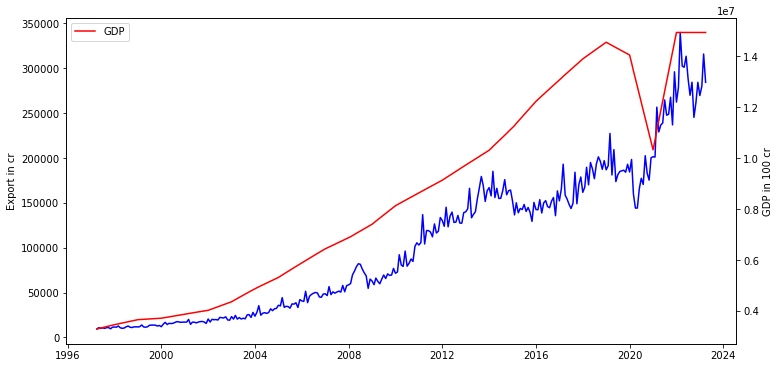

In [ ]:
plt.figure(figsize=(12, 6))

# Plot 'Exports_Total' on the primary Y-axis
plt.plot(df_new['Year'], df_new['Exports_Total'], label='Export', color='blue')
plt.ylabel('Export in cr')

# Create a secondary Y-axis
ax2 = plt.twinx()

# Plot 'India GDP' on the secondary Y-axis
ax2.plot(df_new['Year'], df_new['India GDP'], label='GDP', color='red')

# Add legends for both plots
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Set titles for the primary and secondary Y-axes
ax2.set_ylabel('GDP in 100 cr')

plt.show()

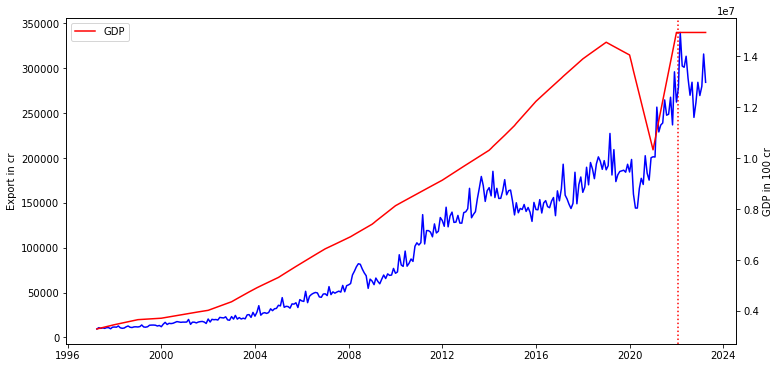

In [ ]:
MAX_TRAINING_DATE = df_new.tail(15).iloc[0]['Year']


plt.figure(figsize=(12, 6))
plt.axvline(MAX_TRAINING_DATE, color='red', linestyle='dotted')


# Plot 'Exports_Total' on the primary Y-axis
plt.plot(df_new['Year'], df_new['Exports_Total'], label='Export', color='blue')
plt.ylabel('Export in cr')

# Create a secondary Y-axis
ax2 = plt.twinx()

# Plot 'India GDP' on the secondary Y-axis
ax2.plot(df_new['Year'], df_new['India GDP'], label='GDP', color='red')

# Add legends for both plots
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Set titles for the primary and secondary Y-axes
ax2.set_ylabel('GDP in 100 cr')

plt.show()

df_train = df_new.loc[df_new['Year'] < MAX_TRAINING_DATE, :]
df_test = df_new.loc[df_new['Year'] >= MAX_TRAINING_DATE, :]

In [ ]:
df_train

Year  Exports_Total     India GDP
0   1997-04-01         9437.0  3.291688e+06
1   1997-05-01        10904.0  3.310429e+06
2   1997-06-01        10116.0  3.329169e+06
3   1997-07-01        10677.0  3.347910e+06
4   1997-08-01        10125.0  3.366650e+06
..         ...            ...           ...
293 2021-09-01       248752.0  1.339187e+07
294 2021-10-01       267655.0  1.377555e+07
295 2021-11-01       236862.0  1.415923e+07
296 2021-12-01       295989.0  1.454291e+07
297 2022-01-01       262280.0  1.492658e+07

[298 rows x 3 columns]

### Building & Optimizing SARIMAX model

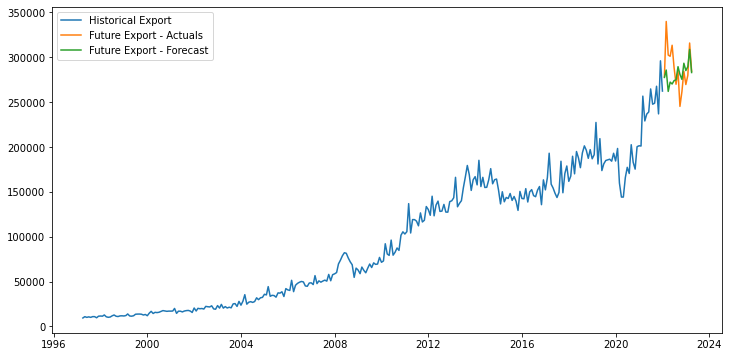

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_GDP = SARIMAX(
    endog = df_train['Exports_Total'],
    exog = df_train['India GDP'],
    order = (1, 1, 1), # p, d, q order parameters for arima
    trend = [0, 0], # A(t) = a0 + a1*t + a2*t^2 ...
    seasonal_order = (1,1,1, 12) # P, D, Q seasonal order parameters
).fit()

forecast = model_GDP.forecast(steps=df_test.shape[0], exog=df_test['India GDP'])

plt.figure(figsize = (12, 6))
plt.plot(df_train['Year'], df_train['Exports_Total'], label='Historical Export')
plt.plot(df_test['Year'], df_test['Exports_Total'], label='Future Export - Actuals')
plt.plot(df_test['Year'], forecast, label='Future Export - Forecast')
plt.legend()
plt.show()

In [ ]:
# Function to 'step' randomly in hyperparameter space
def step(params):
    updated_params = deepcopy(params)
    selected_variable = np.random.choice(['p', 'd', 'q', 'P', 'D', 'Q', 'a0', 'a1'], size=1)[0]
    current_value = updated_params[selected_variable]

    # Update the current value randomly
    updated_value = current_value + np.random.choice([-1, 1], size=1)[0]

    # Enforce parameter limits
    if(selected_variable in ['p', 'q']):
        low, high = 0, 6
    else:
        low, high = 0, 1

    updated_value = min([max([low, updated_value]), high])

    updated_params[selected_variable] = updated_value

    return updated_params

# Function to score hyperparameter set
def score(params, data):

    error_scores = []

    for validation_steps in [1,2,3,4,5]:
        training_set_length = data.shape[0] - validation_steps

        model = SARIMAX(
            endog = data['Exports_Total'].head(training_set_length),
            exog = data['India GDP'].head(training_set_length),
            order = (params['p'], params['d'], params['q']), # p, d, q order parameters for arima
            trend = [params['a0'], params['a1']], # A(t) = a0 + a1*t + a2*t^2 ...
            seasonal_order = (params['P'], params['D'], params['Q'], 12) # P, D, Q seasonal order parameters
        ).fit()

        forecast = model.forecast(steps=validation_steps, exog=data['India GDP'].tail(validation_steps))
        actuals = data['Exports_Total'].tail(validation_steps)

        # compute error metric and return
        error = (forecast.tail(1) - actuals.tail(1)).abs().mean()
        error_scores.append(error)

    return np.mean(error_scores)

In [ ]:
from copy import deepcopy
# Initial guess
x0 = {'p': 1, 'd': 1, 'q': 1, 'P': 1, 'D': 1, 'Q': 1, 'a0': 0, 'a1': 0}
f0 = score(x0, df_train)

# Keep track of best parameters
xbest = deepcopy(x0)
fbest = f0

print('initial parameter score = ', f0)

initial parameter score =  7785.306212725502


In [ ]:
#Running Hyper Parameter search
optimization_steps = 30

temperature = 0.05

optimization_progress = {'f0': [], 'fbest': []}

for t in range(optimization_steps):

    # Randomly changed x0
    x1 = step(x0)
    f1 = score(x1, df_train)

    # If the new point is lower in score than the previous (meaning better)
    if(f1 < f0):
        x0 = deepcopy(x1)
        f0 = f1
    else: # if new point is worse, accept with some probability
        if(np.random.random() < 2**(-(f1-f0)/temperature)):
            x0 = deepcopy(x1)
            f0 = f1

    # Update the 'best' parameters
    if(f0 < fbest):
        fbest = f0
        xbest = deepcopy(x0)

    # Print out progress
    print('current score = {}, best score = {}'.format(f0, fbest))
    optimization_progress['f0'].append(f0)
    optimization_progress['fbest'].append(fbest)

C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


current score = 7785.306212725502, best score = 7785.306212725502
current score = 7785.306212725502, best score = 7785.306212725502
current score = 7785.306212725502, best score = 7785.306212725502
current score = 7785.306212725502, best score = 7785.306212725502
current score = 7785.306212725502, best score = 7785.306212725502


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7344.712642324133, best score = 7344.712642324133


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7344.712642324133, best score = 7344.712642324133


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7344.712642324133, best score = 7344.712642324133


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7344.712642324133, best score = 7344.712642324133
current score = 7344.712642324133, best score = 7344.712642324133
current score = 7344.712642324133, best score = 7344.712642324133
current score = 7344.712642324133, best score = 7344.712642324133
current score = 7344.712642324133, best score = 7344.712642324133
current score = 7344.712642324133, best score = 7344.712642324133


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7344.712642324133, best score = 7344.712642324133


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7344.712642324133, best score = 7344.712642324133
current score = 7344.712642324133, best score = 7344.712642324133


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7344.712642324133, best score = 7344.712642324133


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7187.516434193577, best score = 7187.516434193577


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7187.516434193577, best score = 7187.516434193577
current score = 7187.516434193577, best score = 7187.516434193577


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

current score = 7187.516434193577, best score = 7187.516434193577


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7187.516434193577, best score = 7187.516434193577
current score = 7187.516434193577, best score = 7187.516434193577


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7187.516434193577, best score = 7187.516434193577


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

current score = 7187.516434193577, best score = 7187.516434193577


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7187.516434193577, best score = 7187.516434193577


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

current score = 7187.516434193577, best score = 7187.516434193577
current score = 7187.516434193577, best score = 7187.516434193577


C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 7187.516434193577, best score = 7187.516434193577


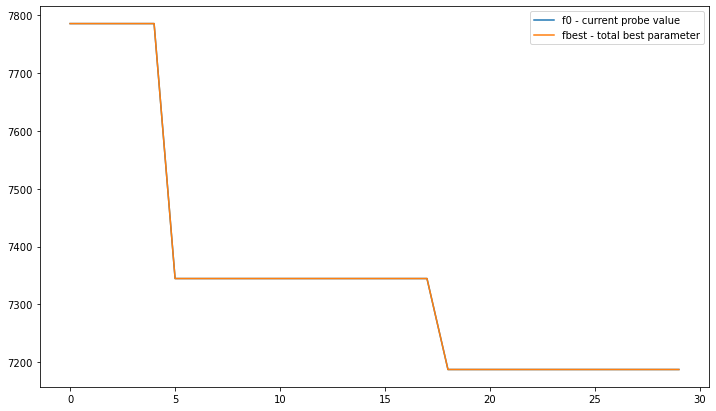

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(optimization_progress['f0'], label = 'f0 - current probe value')
plt.plot(optimization_progress['fbest'], label = 'fbest - total best parameter')
plt.legend()
plt.show()

In [ ]:
print("Best parameter of \n p is :", xbest['p']," \n d is :", xbest['d']," \n q is :",  xbest['q'], " \n a0 is :" ,xbest['a0'], "  \n a1 is :", xbest['a1'], "  \n P is :", xbest['P'], "  \n D is :",  xbest['D'], "  \n Q is :", xbest['Q'])


Best parameter of 
 p is : 2  
 d is : 0  
 q is : 1  
 a0 is : 0   
 a1 is : 0   
 P is : 1   
 D is : 1   
 Q is : 1


### SARIMAX_GDP Forecasting & Accuracy

C:\Users\sebas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


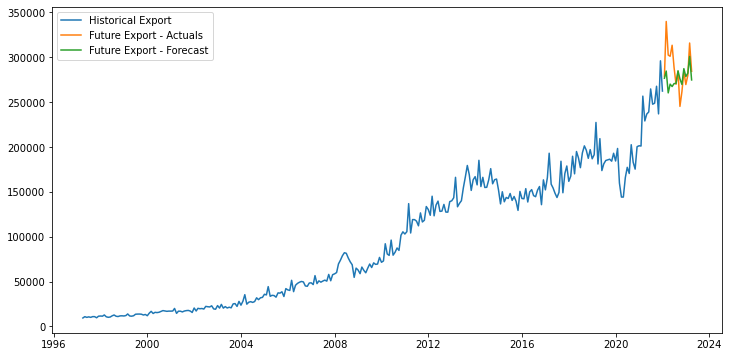

In [ ]:
model_optimised_GDP = SARIMAX(
    endog = df_train['Exports_Total'],
    exog = df_train['India GDP'],
    order = (xbest['p'], xbest['d'], xbest['q']), # p, d, q order parameters for arima
    trend = [xbest['a0'], xbest['a1']], # A(t) = a0 + a1*t + a2*t^2 ...
    seasonal_order = (xbest['P'], xbest['D'], xbest['Q'], 12) # P, D, Q seasonal order parameters
).fit()

forecast = model_optimised_GDP.forecast(steps=df_test.shape[0], exog=df_test['India GDP'])

plt.figure(figsize = (12, 6))
plt.plot(df_train['Year'], df_train['Exports_Total'], label='Historical Export')
plt.plot(df_test['Year'], df_test['Exports_Total'], label='Future Export - Actuals')
plt.plot(df_test['Year'], forecast, label='Future Export - Forecast')
plt.legend()
plt.show()

In [ ]:
print(model_optimised_GDP.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Exports_Total   No. Observations:                  298
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -3031.745
Date:                            Thu, 05 Oct 2023   AIC                           6077.490
Time:                                    20:36:57   BIC                           6103.082
Sample:                                         0   HQIC                          6087.748
                                            - 298                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
India GDP      0.0054      0.003      1.927      0.054   -9.18e-05       0.011
ar.L1          0.6648      0.179   

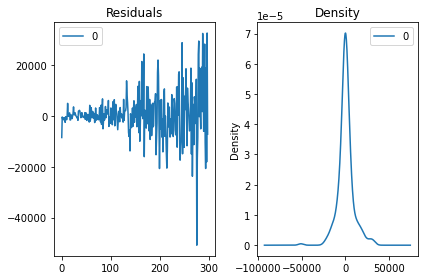

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_optimised_GDP.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()
plt.show()

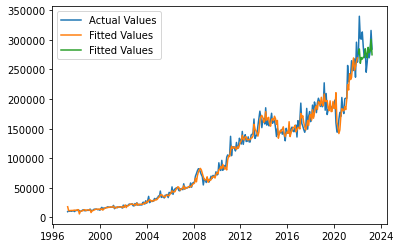

In [ ]:
actual_values2 = df_new["Exports_Total"]
fitted_values2 = model_optimised_GDP.predict()
forecast = model_optimised_GDP.forecast(steps=df_test.shape[0], exog=df_test['India GDP'])

appended_forecast = pd.concat([fitted_values2, forecast], ignore_index=True)

# Plot the actual and fitted values
plt.plot(df_new['Year'],actual_values2, label='Actual Values')
plt.plot(df_train['Year'],fitted_values2, label='Fitted Values')
plt.plot(df_test['Year'],forecast, label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
actual2=np.array(actual_values2)
forecast2=np.array(appended_forecast)

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast2, actual2)

{'mape': 0.06797635364141201,
 'me': -1188.7579855485076,
 'mae': 6298.73037013884,
 'mpe': -0.003467629837633601,
 'rmse': 10322.67186384178,
 'acf1': 0.18164883717711716,
 'corr': 0.992093580764062,
 'minmax': 0.06390631465811547}

### As seen from the model, SARIMAX(2,0,1,12) with GDP as exogenous variable is the better model to forecast exports of India for the next decade with an accuracy of 94% in comparison to 93% accuracy of SARIMA model

## Model 4: SARIMAX model with Forex Rate [USD to INR] as exogenous variable

### Exogenous variable 2-Forex Rate UDS to INR Dataset: https://in.investing.com/currencies/usd-inr-historical-data?end_date=1696522564&interval_sec=monthly&st_date=-725520600

### Importing exogenous variable - Forex Rate

In [ ]:
Forex = pd.read_excel('USDtoINR_dataset.xlsx',sheet_name="USDtoINR", parse_dates=['Year'])
Forex.head()

Year   Price    Open    High     Low  Volume    Chg%
0 2023-10-01  83.231  83.035  84.704  83.035       0  0.0024
1 2023-09-01  83.030  82.647  83.360  82.576       0  0.0040
2 2023-08-01  82.702  82.240  83.467  82.222       0  0.0056
3 2023-07-01  82.240  82.061  82.821  81.666       0  0.0018
4 2023-06-01  82.096  82.666  82.685  81.825       0 -0.0072

In [ ]:
df_Forex=Forex[["Year","Price"]]
df_Forex.head()

df_Forex

Year   Price
0   2023-10-01  83.231
1   2023-09-01  83.030
2   2023-08-01  82.702
3   2023-07-01  82.240
4   2023-06-01  82.096
..         ...     ...
604 1973-06-01   7.300
605 1973-05-01   7.390
606 1973-04-01   7.530
607 1973-03-01   7.550
608 1973-02-01   7.520

[609 rows x 2 columns]

In [ ]:
df_new = pd.merge(
    left = df,
    right = df_Forex,
    on = 'Year',
    how = 'outer'
).sort_values(by = 'Year', ascending=True)

df_new

Year  Exports_Total   Price
608 1973-02-01            NaN   7.520
607 1973-03-01            NaN   7.550
606 1973-04-01            NaN   7.530
605 1973-05-01            NaN   7.390
604 1973-06-01            NaN   7.300
..         ...            ...     ...
317 2023-06-01            NaN  82.096
316 2023-07-01            NaN  82.240
315 2023-08-01            NaN  82.702
314 2023-09-01            NaN  83.030
313 2023-10-01            NaN  83.231

[609 rows x 3 columns]

In [ ]:
df_new['Price'] = df_new['Price'].interpolate(method='linear', limit_direction='forward')
df_new = df_new.dropna(axis=0, how='any').reset_index(drop=True)
df_new

Year  Exports_Total   Price
0   1997-04-01         9437.0  35.760
1   1997-05-01        10904.0  35.770
2   1997-06-01        10116.0  35.800
3   1997-07-01        10677.0  35.700
4   1997-08-01        10125.0  36.405
..         ...            ...     ...
308 2022-12-01       284311.0  82.745
309 2023-01-01       269561.0  81.769
310 2023-02-01       279856.0  82.645
311 2023-03-01       315833.0  82.185
312 2023-04-01       284299.0  81.745

[313 rows x 3 columns]

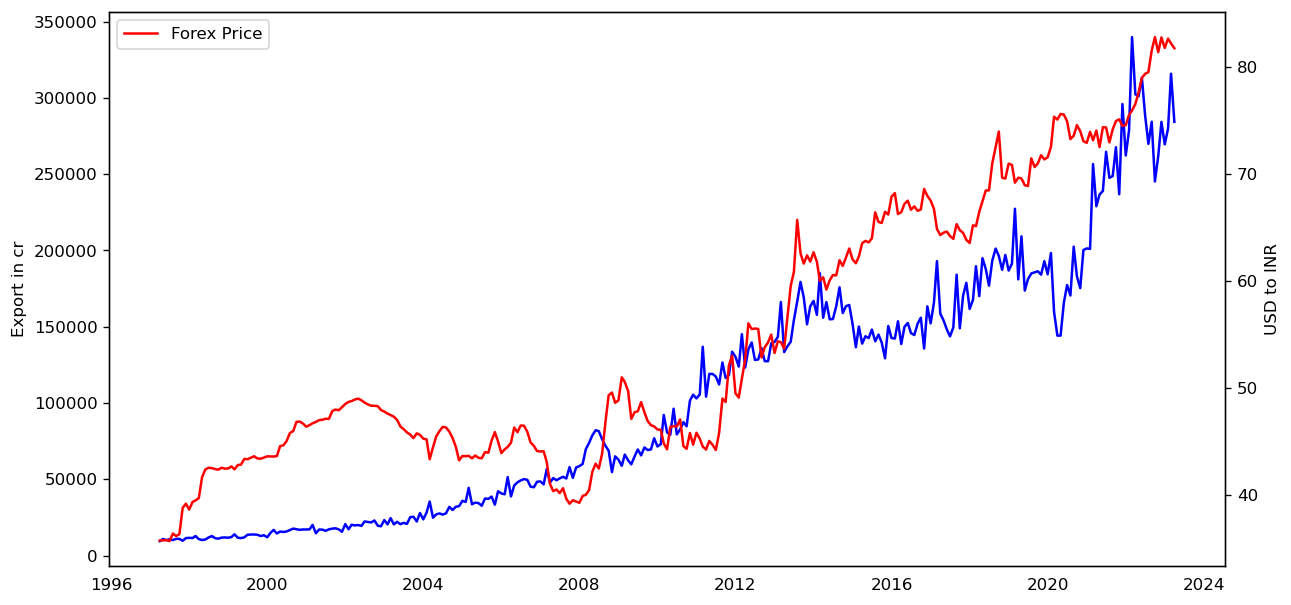

In [ ]:
plt.figure(figsize=(12, 6))

# Plot 'Exports_Total' on the primary Y-axis
plt.plot(df_new['Year'], df_new['Exports_Total'], label='Export', color='blue')
plt.ylabel('Export in cr')

# Create a secondary Y-axis
ax2 = plt.twinx()

# Plot 'Forex Rate' on the secondary Y-axis
ax2.plot(df_new['Year'], df_new['Price'], label='Forex Price', color='red')

# Add legends for both plots
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Set titles for the primary and secondary Y-axes
ax2.set_ylabel('USD to INR')

plt.show()

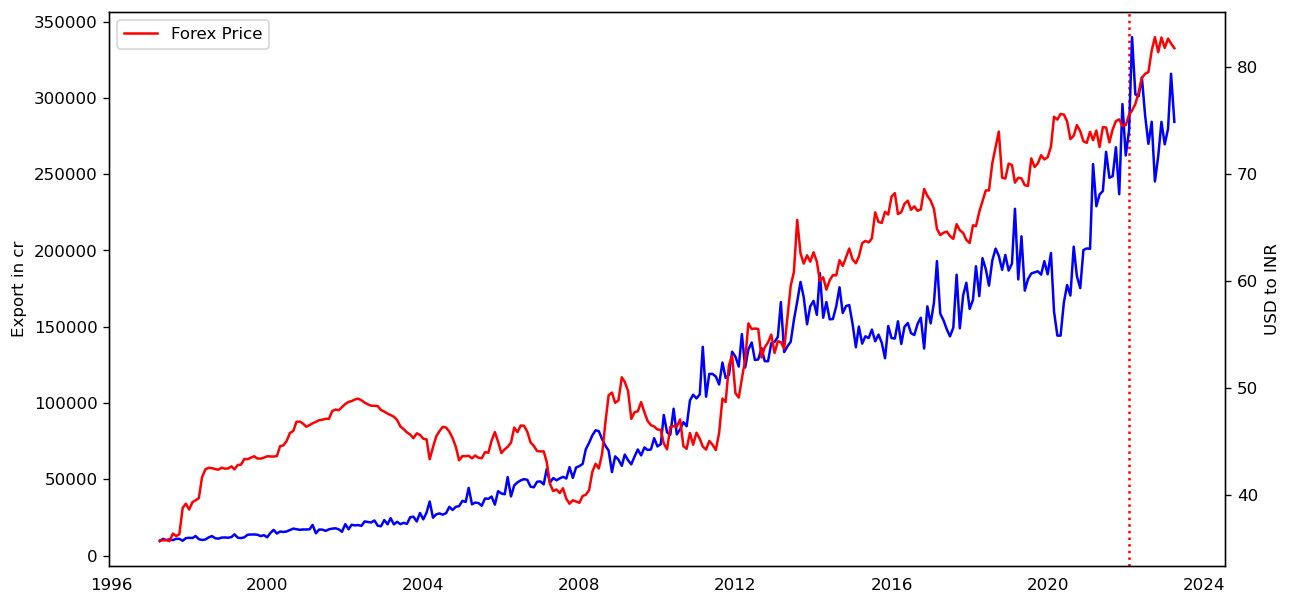

In [ ]:
MAX_TRAINING_DATE = df_new.tail(15).iloc[0]['Year']


plt.figure(figsize=(12, 6))
plt.axvline(MAX_TRAINING_DATE, color='red', linestyle='dotted')


# Plot 'Exports_Total' on the primary Y-axis
plt.plot(df_new['Year'], df_new['Exports_Total'], label='Export', color='blue')
plt.ylabel('Export in cr')

# Create a secondary Y-axis
ax2 = plt.twinx()

# Plot 'Forex Rate' on the secondary Y-axis
ax2.plot(df_new['Year'], df_new['Price'], label='Forex Price', color='red')

# Add legends for both plots
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Set titles for the primary and secondary Y-axes
ax2.set_ylabel('USD to INR')

plt.show()

df_train = df_new.loc[df_new['Year'] < MAX_TRAINING_DATE, :]
df_test = df_new.loc[df_new['Year'] >= MAX_TRAINING_DATE, :]

In [ ]:
df_train

Year  Exports_Total   Price
0   1997-04-01         9437.0  35.760
1   1997-05-01        10904.0  35.770
2   1997-06-01        10116.0  35.800
3   1997-07-01        10677.0  35.700
4   1997-08-01        10125.0  36.405
..         ...            ...     ...
293 2021-09-01       248752.0  74.170
294 2021-10-01       267655.0  74.935
295 2021-11-01       236862.0  75.100
296 2021-12-01       295989.0  74.486
297 2022-01-01       262280.0  74.556

[298 rows x 3 columns]

### Building & Optimizing SARIMAX model

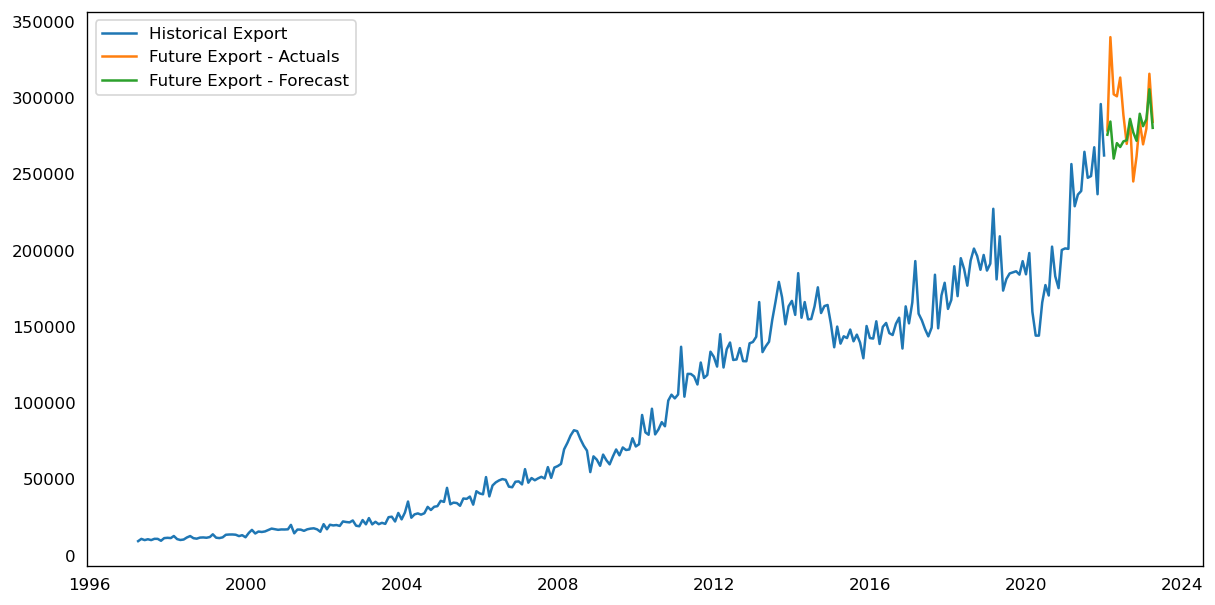

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_Forex = SARIMAX(
    endog = df_train['Exports_Total'],
    exog = df_train['Price'],
    order = (1, 1, 1), # p, d, q order parameters for arima
    trend = [0, 0], # A(t) = a0 + a1*t + a2*t^2 ...
    seasonal_order = (1,1,1, 12) # P, D, Q seasonal order parameters
).fit()

forecast = model_Forex.forecast(steps=df_test.shape[0], exog=df_test['Price'])

plt.figure(figsize = (12, 6))
plt.plot(df_train['Year'], df_train['Exports_Total'], label='Historical Export')
plt.plot(df_test['Year'], df_test['Exports_Total'], label='Future Export - Actuals')
plt.plot(df_test['Year'], forecast, label='Future Export - Forecast')
plt.legend()
plt.show()

In [ ]:
# Function to 'step' randomly in hyperparameter space
def step(params):
    updated_params = deepcopy(params)
    selected_variable = np.random.choice(['p', 'd', 'q', 'P', 'D', 'Q', 'a0', 'a1'], size=1)[0]
    current_value = updated_params[selected_variable]

    # Update the current value randomly
    updated_value = current_value + np.random.choice([-1, 1], size=1)[0]

    # Enforce parameter limits
    if(selected_variable in ['p', 'q']):
        low, high = 0, 6
    else:
        low, high = 0, 1

    updated_value = min([max([low, updated_value]), high])

    updated_params[selected_variable] = updated_value

    return updated_params

# Function to score hyperparameter set
def score(params, data):

    error_scores = []

    for validation_steps in [1,2,3,4,5]:
        training_set_length = data.shape[0] - validation_steps

        model = SARIMAX(
            endog = data['Exports_Total'].head(training_set_length),
            exog = data['Price'].head(training_set_length),
            order = (params['p'], params['d'], params['q']), # p, d, q order parameters for arima
            trend = [params['a0'], params['a1']], # A(t) = a0 + a1*t + a2*t^2 ...
            seasonal_order = (params['P'], params['D'], params['Q'], 12) # P, D, Q seasonal order parameters
        ).fit()

        forecast = model.forecast(steps=validation_steps, exog=data['Price'].tail(validation_steps))
        actuals = data['Exports_Total'].tail(validation_steps)

        # compute error metric and return
        error = (forecast.tail(1) - actuals.tail(1)).abs().mean()
        error_scores.append(error)

    return np.mean(error_scores)

In [ ]:
from copy import deepcopy
# Initial guess
x0 = {'p': 1, 'd': 1, 'q': 1, 'P': 1, 'D': 1, 'Q': 1, 'a0': 0, 'a1': 0}
f0 = score(x0, df_train)

# Keep track of best parameters
xbest = deepcopy(x0)
fbest = f0

print('initial parameter score = ', f0)

initial parameter score =  9116.493102165794


In [ ]:
#Running Hyper Parameter search
optimization_steps = 30

temperature = 0.05

optimization_progress = {'f0': [], 'fbest': []}

for t in range(optimization_steps):

    # Randomly changed x0
    x1 = step(x0)
    f1 = score(x1, df_train)

    # If the new point is lower in score than the previous (meaning better)
    if(f1 < f0):
        x0 = deepcopy(x1)
        f0 = f1
    else: # if new point is worse, accept with some probability
        if(np.random.random() < 2**(-(f1-f0)/temperature)):
            x0 = deepcopy(x1)
            f0 = f1

    # Update the 'best' parameters
    if(f0 < fbest):
        fbest = f0
        xbest = deepcopy(x0)

    # Print out progress
    print('current score = {}, best score = {}'.format(f0, fbest))
    optimization_progress['f0'].append(f0)
    optimization_progress['fbest'].append(fbest)

current score = 9116.493102165794, best score = 9116.493102165794
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 6923.790956355986, best score = 6923.790956355986
current score = 6923.790956355986, best score = 6923.790956355986


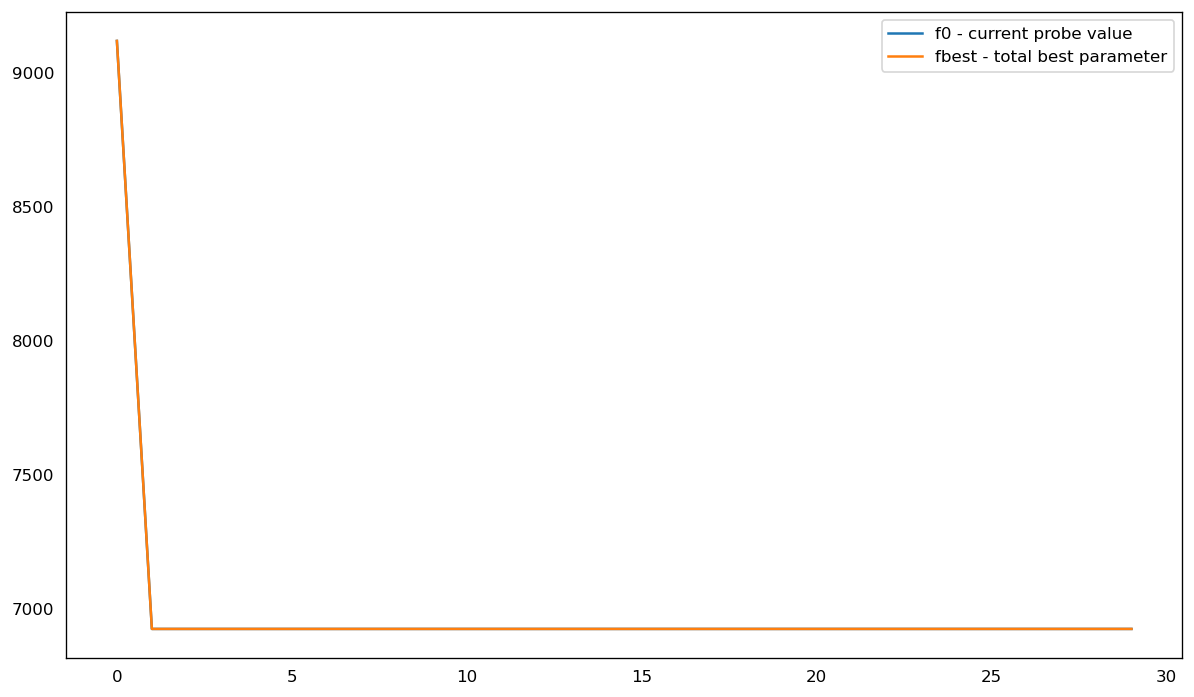

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(optimization_progress['f0'], label = 'f0 - current probe value')
plt.plot(optimization_progress['fbest'], label = 'fbest - total best parameter')
plt.legend()
plt.show()

In [ ]:
print("Best parameter of \n p is :", xbest['p']," \n d is :", xbest['d']," \n q is :",  xbest['q'], " \n a0 is :" ,xbest['a0'], "  \n a1 is :", xbest['a1'], "  \n P is :", xbest['P'], "  \n D is :",  xbest['D'], "  \n Q is :", xbest['Q'])


Best parameter of 
 p is : 1  
 d is : 1  
 q is : 1  
 a0 is : 1   
 a1 is : 0   
 P is : 1   
 D is : 1   
 Q is : 1


### SARIMAX_Forex Forecasting & Accuracy

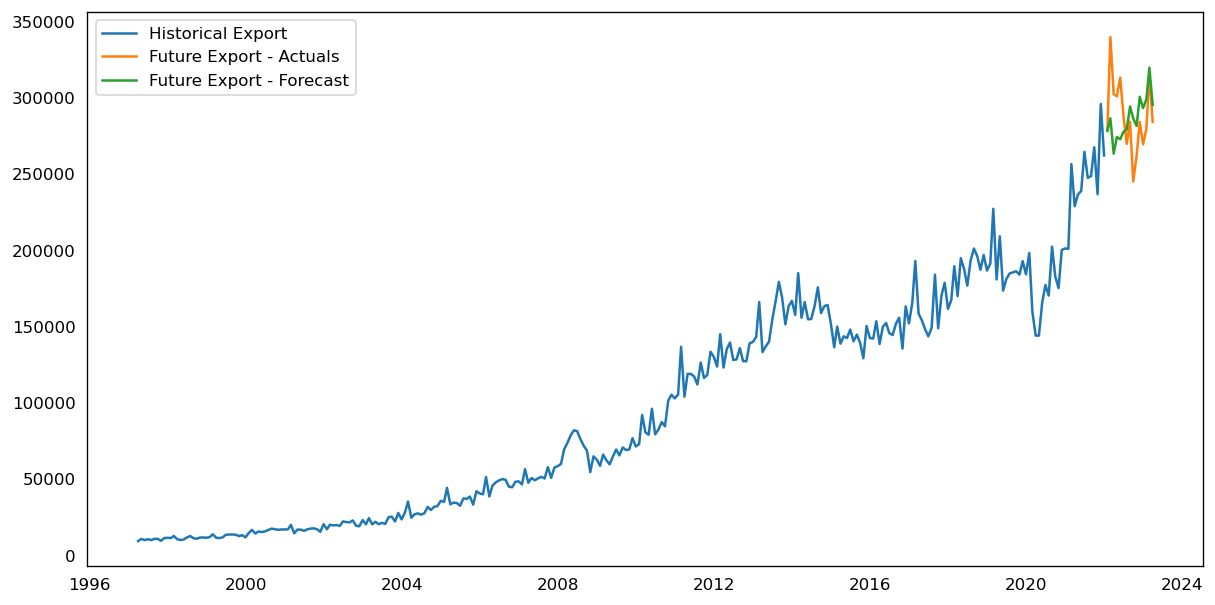

In [ ]:
model_optimised_Forex = SARIMAX(
    endog = df_train['Exports_Total'],
    exog = df_train['Price'],
    order = (xbest['p'], xbest['d'], xbest['q']), # p, d, q order parameters for arima
    trend = [xbest['a0'], xbest['a1']], # A(t) = a0 + a1*t + a2*t^2 ...
    seasonal_order = (xbest['P'], xbest['D'], xbest['Q'], 12) # P, D, Q seasonal order parameters
).fit()

forecast = model_optimised_Forex.forecast(steps=df_test.shape[0], exog=df_test['Price'])

plt.figure(figsize = (12, 6))
plt.plot(df_train['Year'], df_train['Exports_Total'], label='Historical Export')
plt.plot(df_test['Year'], df_test['Exports_Total'], label='Future Export - Actuals')
plt.plot(df_test['Year'], forecast, label='Future Export - Forecast')
plt.legend()
plt.show()

In [ ]:
print(model_optimised_Forex.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Exports_Total   No. Observations:                  298
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3027.415
Date:                            Thu, 05 Oct 2023   AIC                           6068.829
Time:                                    22:53:04   BIC                           6094.397
Sample:                                         0   HQIC                          6079.079
                                            - 298                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    335.3935    258.011      1.300      0.194    -170.299     841.086
Price       -259.9428    474.904   

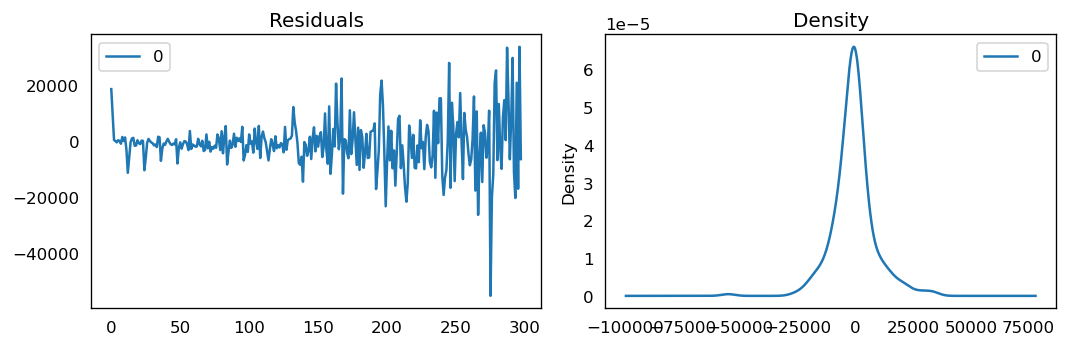

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_optimised_Forex.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()
plt.show()

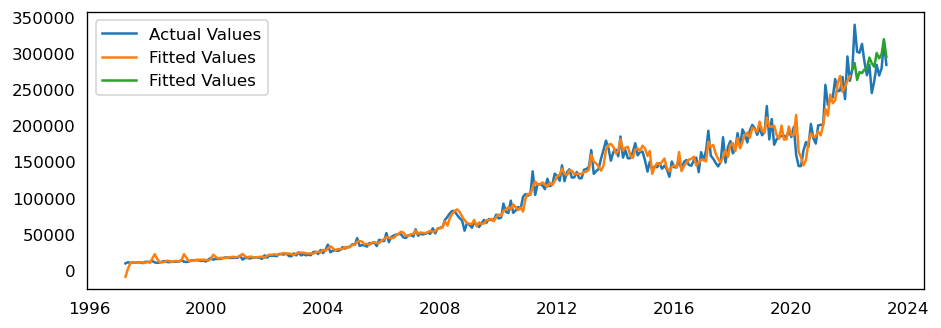

In [ ]:
actual_values2 = df_new["Exports_Total"]
fitted_values2 = model_optimised_Forex.predict()
forecast = model_optimised_Forex.forecast(steps=df_test.shape[0], exog=df_test['Price'])

appended_forecast = pd.concat([fitted_values2, forecast], ignore_index=True)

# Plot the actual and fitted values
plt.plot(df_new['Year'],actual_values2, label='Actual Values')
plt.plot(df_train['Year'],fitted_values2, label='Fitted Values')
plt.plot(df_test['Year'],forecast, label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
actual2=np.array(actual_values2)
forecast2=np.array(appended_forecast)

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast2, actual2)

NameError: name 'forecast2' is not defined

### As seen from the model, SARIMAX(1,1,1,12) with Forex Rate [USD to INR] as exogenous variable is not the better model to forecast Forex Rate of India for the next decade with an accuracy of 91% in comparison to 93% accuracy of SARIMA model

## Model 5: SARIMAX model with Interest Rate as exogenous variable

### Exogenous variable 3-Forex Rate UDS to INR Dataset: https://in.investing.com/economic-calendar/indian-interest-rate-decision-597

### Importing exogenous variable - Interest Rate

In [ ]:
InterestRate = pd.read_excel('InterestRate.xlsx',sheet_name="InterestRate", parse_dates=['Year'])
InterestRate.head()

Year  Actual
0 2023-04-01  0.0650
1 2023-03-01  0.0650
2 2023-02-01  0.0650
3 2023-01-01  0.0650
4 2022-12-01  0.0625

In [ ]:
df_InterestRate=InterestRate[["Year","Actual"]]
df_InterestRate.head()

df_InterestRate

Year  Actual
0   2023-04-01  0.0650
1   2023-03-01  0.0650
2   2023-02-01  0.0650
3   2023-01-01  0.0650
4   2022-12-01  0.0625
..         ...     ...
268 2000-12-01  0.0800
269 2000-11-01  0.0861
270 2000-10-01  0.1052
271 2000-09-01  0.1335
272 2000-08-01  0.0738

[273 rows x 2 columns]

In [ ]:
df_new = pd.merge(
    left = df,
    right = df_InterestRate,
    on = 'Year',
    how = 'outer'
).sort_values(by = 'Year', ascending=True)

df_new

Year  Exports_Total  Actual
0   1997-04-01           9437     NaN
1   1997-05-01          10904     NaN
2   1997-06-01          10116     NaN
3   1997-07-01          10677     NaN
4   1997-08-01          10125     NaN
..         ...            ...     ...
308 2022-12-01         284311  0.0625
309 2023-01-01         269561  0.0650
310 2023-02-01         279856  0.0650
311 2023-03-01         315833  0.0650
312 2023-04-01         284299  0.0650

[313 rows x 3 columns]

In [ ]:
df_new['Actual'] = df_new['Actual'].interpolate(method='linear', limit_direction='forward')
df_new = df_new.dropna(axis=0, how='any').reset_index(drop=True)
df_new

Year  Exports_Total  Actual
0   2000-08-01          16762  0.0738
1   2000-09-01          17658  0.1335
2   2000-10-01          17235  0.1052
3   2000-11-01          16857  0.0861
4   2000-12-01          17098  0.0800
..         ...            ...     ...
268 2022-12-01         284311  0.0625
269 2023-01-01         269561  0.0650
270 2023-02-01         279856  0.0650
271 2023-03-01         315833  0.0650
272 2023-04-01         284299  0.0650

[273 rows x 3 columns]

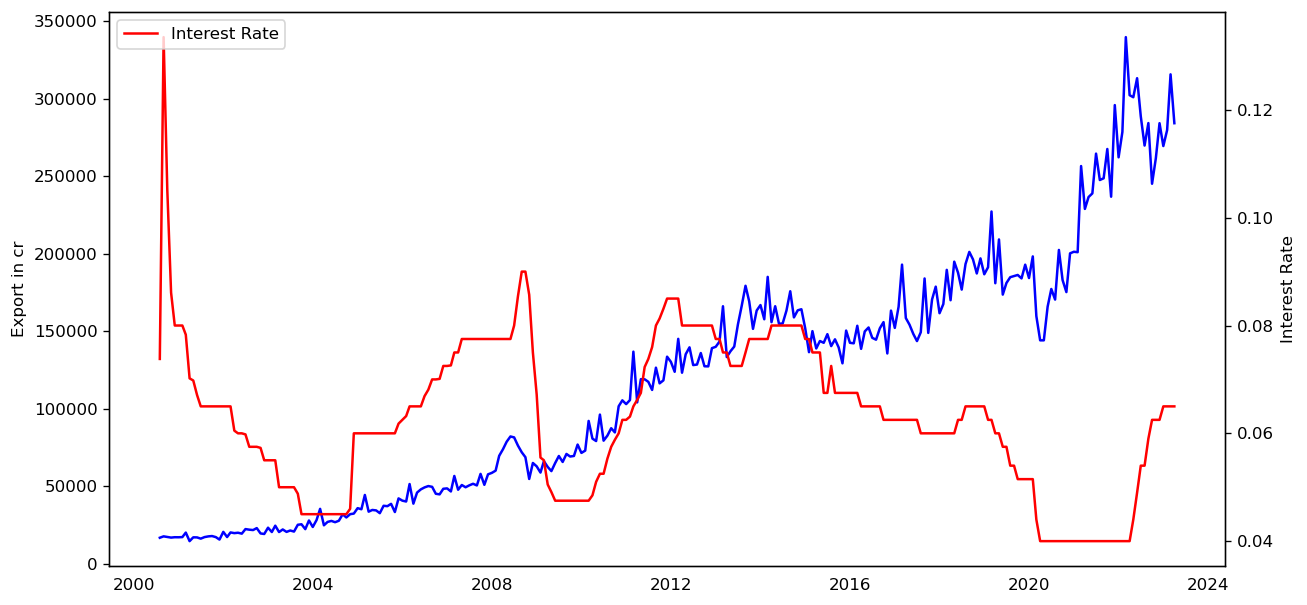

In [ ]:
plt.figure(figsize=(12, 6))

# Plot 'Exports_Total' on the primary Y-axis
plt.plot(df_new['Year'], df_new['Exports_Total'], label='Export', color='blue')
plt.ylabel('Export in cr')

# Create a secondary Y-axis
ax2 = plt.twinx()

# Plot 'Interest Rate' on the secondary Y-axis
ax2.plot(df_new['Year'], df_new['Actual'], label='Interest Rate', color='red')

# Add legends for both plots
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Set titles for the primary and secondary Y-axes
ax2.set_ylabel('Interest Rate')

plt.show()

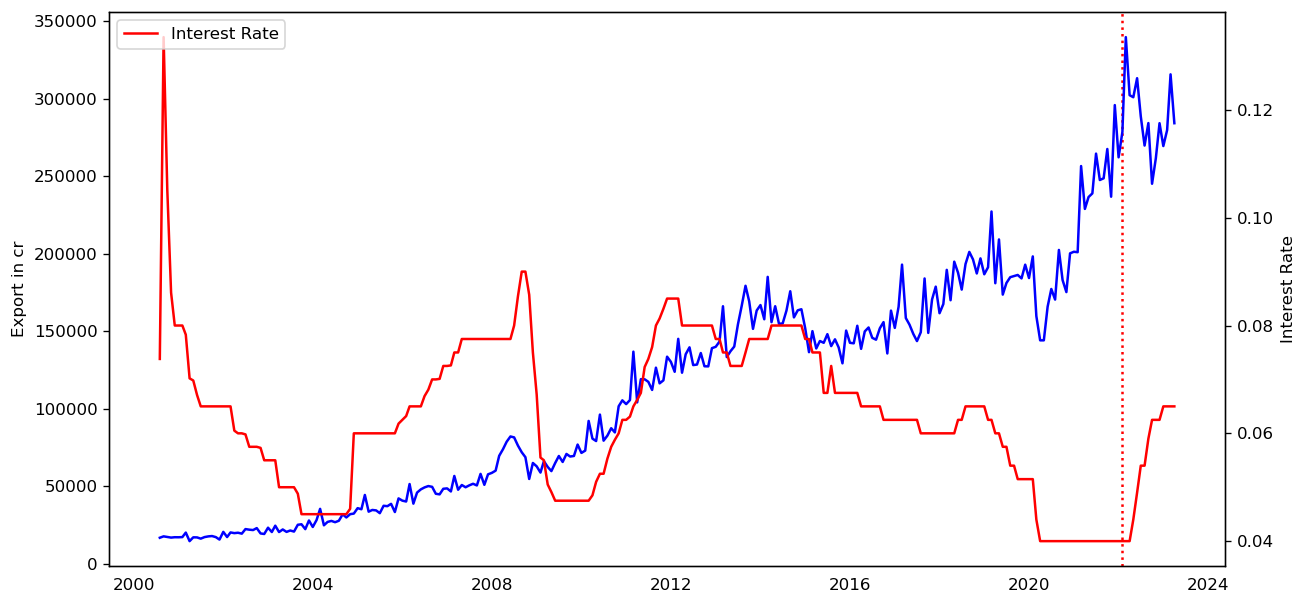

In [ ]:
MAX_TRAINING_DATE = df_new.tail(15).iloc[0]['Year']


plt.figure(figsize=(12, 6))
plt.axvline(MAX_TRAINING_DATE, color='red', linestyle='dotted')


# Plot 'Exports_Total' on the primary Y-axis
plt.plot(df_new['Year'], df_new['Exports_Total'], label='Export', color='blue')
plt.ylabel('Export in cr')

# Create a secondary Y-axis
ax2 = plt.twinx()

# Plot 'Interest Rate' on the secondary Y-axis
ax2.plot(df_new['Year'], df_new['Actual'], label='Interest Rate', color='red')

# Add legends for both plots
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Set titles for the primary and secondary Y-axes
ax2.set_ylabel('Interest Rate')

plt.show()

df_train = df_new.loc[df_new['Year'] < MAX_TRAINING_DATE, :]
df_test = df_new.loc[df_new['Year'] >= MAX_TRAINING_DATE, :]

In [ ]:
df_train

Year  Exports_Total  Actual
0   2000-08-01          16762  0.0738
1   2000-09-01          17658  0.1335
2   2000-10-01          17235  0.1052
3   2000-11-01          16857  0.0861
4   2000-12-01          17098  0.0800
..         ...            ...     ...
253 2021-09-01         248752  0.0400
254 2021-10-01         267655  0.0400
255 2021-11-01         236862  0.0400
256 2021-12-01         295989  0.0400
257 2022-01-01         262280  0.0400

[258 rows x 3 columns]

### Building & Optimizing SARIMAX model

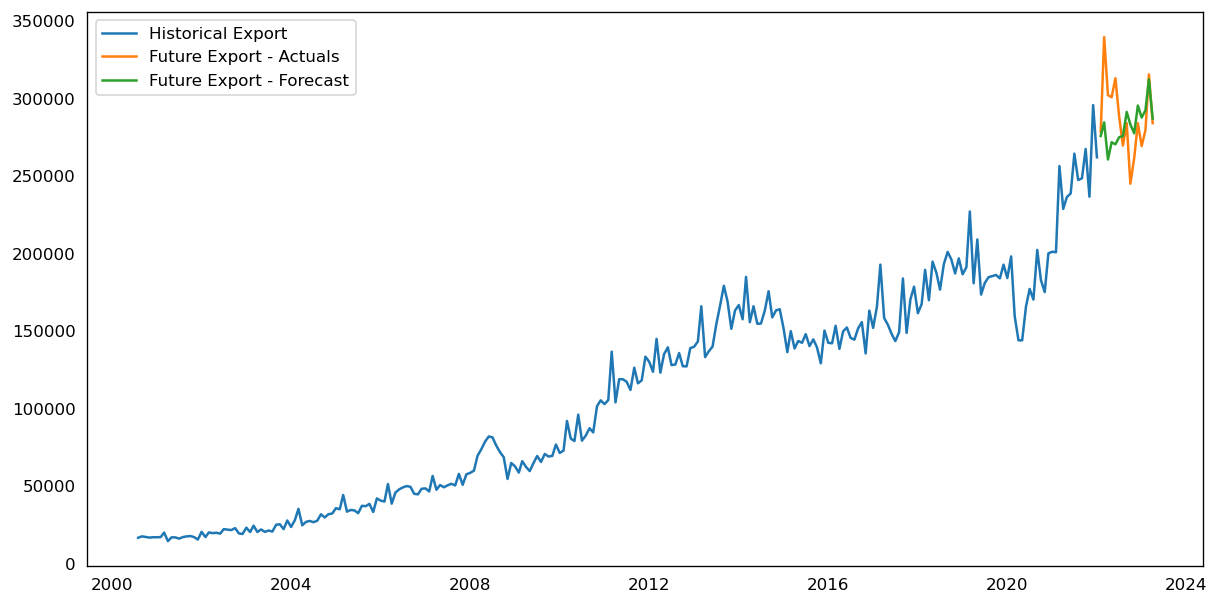

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_InterestRate = SARIMAX(
    endog = df_train['Exports_Total'],
    exog = df_train['Actual'],
    order = (1, 1, 1), # p, d, q order parameters for arima
    trend = [0, 0], # A(t) = a0 + a1*t + a2*t^2 ...
    seasonal_order = (1,1,1, 12) # P, D, Q seasonal order parameters
).fit()

forecast = model_InterestRate.forecast(steps=df_test.shape[0], exog=df_test['Actual'])

plt.figure(figsize = (12, 6))
plt.plot(df_train['Year'], df_train['Exports_Total'], label='Historical Export')
plt.plot(df_test['Year'], df_test['Exports_Total'], label='Future Export - Actuals')
plt.plot(df_test['Year'], forecast, label='Future Export - Forecast')
plt.legend()
plt.show()

In [ ]:
# Function to 'step' randomly in hyperparameter space
def step(params):
    updated_params = deepcopy(params)
    selected_variable = np.random.choice(['p', 'd', 'q', 'P', 'D', 'Q', 'a0', 'a1'], size=1)[0]
    current_value = updated_params[selected_variable]

    # Update the current value randomly
    updated_value = current_value + np.random.choice([-1, 1], size=1)[0]

    # Enforce parameter limits
    if(selected_variable in ['p', 'q']):
        low, high = 0, 6
    else:
        low, high = 0, 1

    updated_value = min([max([low, updated_value]), high])

    updated_params[selected_variable] = updated_value

    return updated_params

# Function to score hyperparameter set
def score(params, data):

    error_scores = []

    for validation_steps in [1,2,3,4,5]:
        training_set_length = data.shape[0] - validation_steps

        model = SARIMAX(
            endog = data['Exports_Total'].head(training_set_length),
            exog = data['Actual'].head(training_set_length),
            order = (params['p'], params['d'], params['q']), # p, d, q order parameters for arima
            trend = [params['a0'], params['a1']], # A(t) = a0 + a1*t + a2*t^2 ...
            seasonal_order = (params['P'], params['D'], params['Q'], 12) # P, D, Q seasonal order parameters
        ).fit()

        forecast = model.forecast(steps=validation_steps, exog=data['Actual'].tail(validation_steps))
        actuals = data['Exports_Total'].tail(validation_steps)

        # compute error metric and return
        error = (forecast.tail(1) - actuals.tail(1)).abs().mean()
        error_scores.append(error)

    return np.mean(error_scores)

In [ ]:
from copy import deepcopy
# Initial guess
x0 = {'p': 1, 'd': 1, 'q': 1, 'P': 1, 'D': 1, 'Q': 1, 'a0': 0, 'a1': 0}
f0 = score(x0, df_train)

# Keep track of best parameters
xbest = deepcopy(x0)
fbest = f0

print('initial parameter score = ', f0)

initial parameter score =  8779.508038068196


In [ ]:
#Running Hyper Parameter search
optimization_steps = 30

temperature = 0.05

optimization_progress = {'f0': [], 'fbest': []}

for t in range(optimization_steps):

    # Randomly changed x0
    x1 = step(x0)
    f1 = score(x1, df_train)

    # If the new point is lower in score than the previous (meaning better)
    if(f1 < f0):
        x0 = deepcopy(x1)
        f0 = f1
    else: # if new point is worse, accept with some probability
        if(np.random.random() < 2**(-(f1-f0)/temperature)):
            x0 = deepcopy(x1)
            f0 = f1

    # Update the 'best' parameters
    if(f0 < fbest):
        fbest = f0
        xbest = deepcopy(x0)

    # Print out progress
    print('current score = {}, best score = {}'.format(f0, fbest))
    optimization_progress['f0'].append(f0)
    optimization_progress['fbest'].append(fbest)

current score = 8779.508038068196, best score = 8779.508038068196
current score = 8779.508038068196, best score = 8779.508038068196
current score = 8779.508038068196, best score = 8779.508038068196
current score = 8779.508038068196, best score = 8779.508038068196
current score = 6852.168282373197, best score = 6852.168282373197
current score = 6852.168282373197, best score = 6852.168282373197
current score = 6852.168282373197, best score = 6852.168282373197
current score = 6852.168282373197, best score = 6852.168282373197
current score = 6852.168282373197, best score = 6852.168282373197
current score = 6852.168282373197, best score = 6852.168282373197
current score = 6852.168282373197, best score = 6852.168282373197
current score = 6852.168282373197, best score = 6852.168282373197


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


current score = 6852.168282373197, best score = 6852.168282373197


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anis

current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anis

current score = 6681.223390027636, best score = 6681.223390027636
current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anis

current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\stats

current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anis

current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anish\anaconda3\lib\s

current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\stats

current score = 6681.223390027636, best score = 6681.223390027636
current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anis

current score = 6681.223390027636, best score = 6681.223390027636
current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anis

current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anis

current score = 6681.223390027636, best score = 6681.223390027636
current score = 6681.223390027636, best score = 6681.223390027636
current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\stats

current score = 6681.223390027636, best score = 6681.223390027636


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\stats

current score = 6681.223390027636, best score = 6681.223390027636


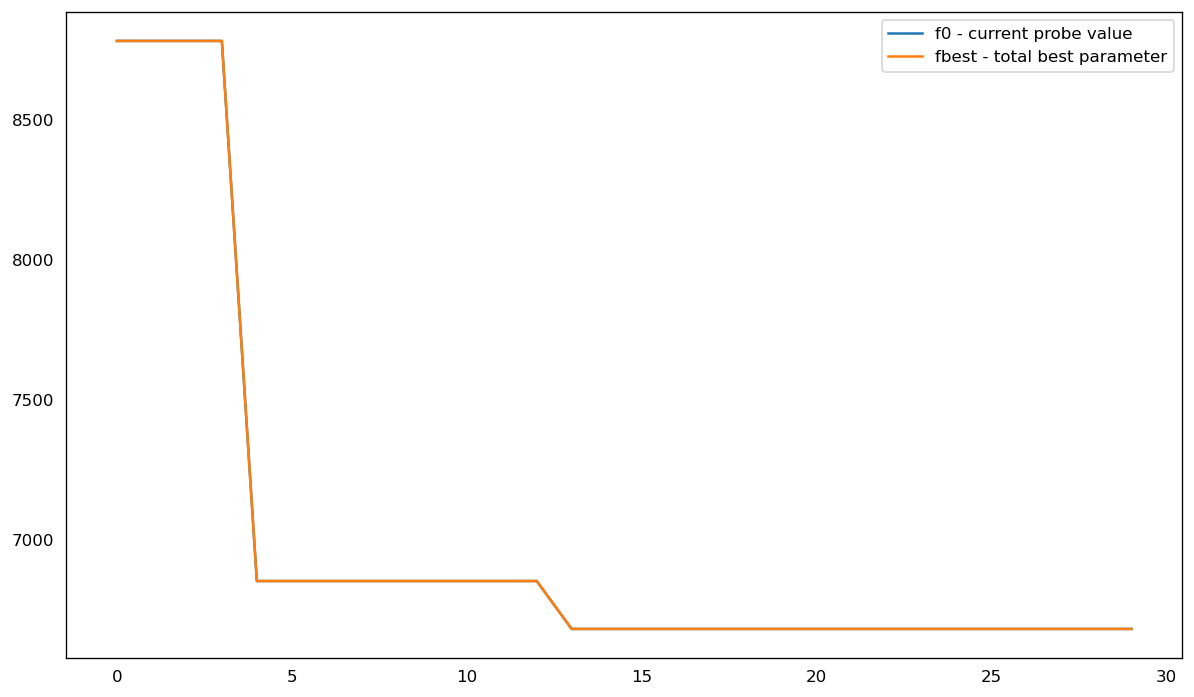

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(optimization_progress['f0'], label = 'f0 - current probe value')
plt.plot(optimization_progress['fbest'], label = 'fbest - total best parameter')
plt.legend()
plt.show()

In [ ]:
print("Best parameter of \n p is :", xbest['p']," \n d is :", xbest['d']," \n q is :",  xbest['q'], " \n a0 is :" ,xbest['a0'], "  \n a1 is :", xbest['a1'], "  \n P is :", xbest['P'], "  \n D is :",  xbest['D'], "  \n Q is :", xbest['Q'])


Best parameter of 
 p is : 2  
 d is : 1  
 q is : 1  
 a0 is : 1   
 a1 is : 0   
 P is : 1   
 D is : 1   
 Q is : 1


### SARIMAX_InterestRate Forecasting & Accuracy

C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


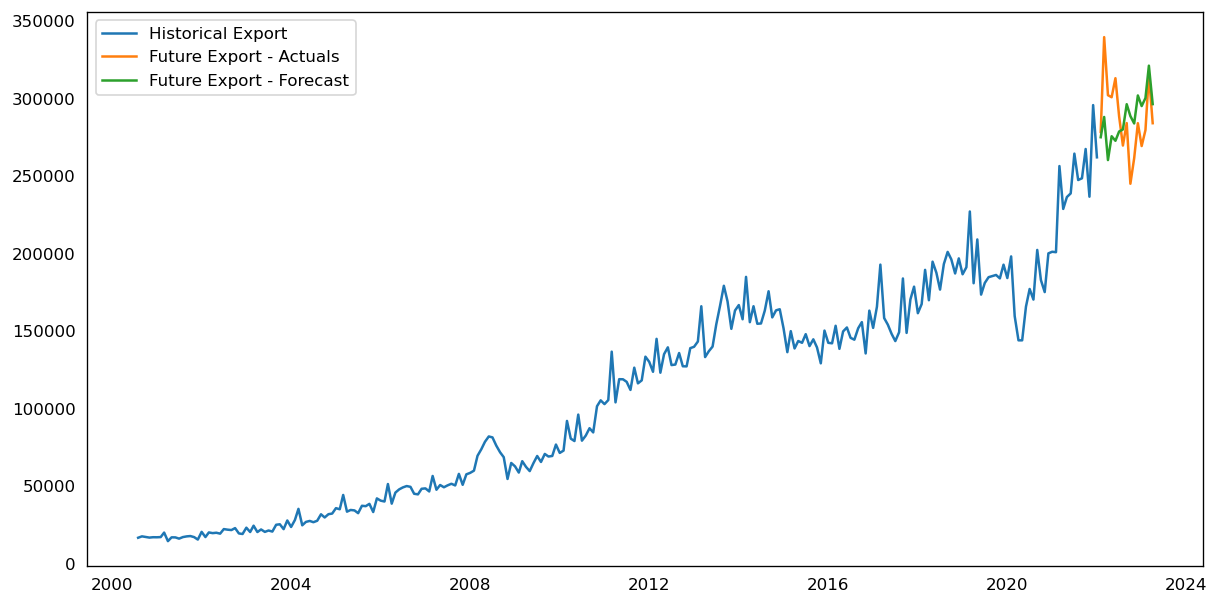

In [ ]:
model_optimised_InterestRate = SARIMAX(
    endog = df_train['Exports_Total'],
    exog = df_train['Actual'],
    order = (xbest['p'], xbest['d'], xbest['q']), # p, d, q order parameters for arima
    trend = [xbest['a0'], xbest['a1']], # A(t) = a0 + a1*t + a2*t^2 ...
    seasonal_order = (xbest['P'], xbest['D'], xbest['Q'], 12) # P, D, Q seasonal order parameters
).fit()

forecast = model_optimised_InterestRate.forecast(steps=df_test.shape[0], exog=df_test['Actual'])

plt.figure(figsize = (12, 6))
plt.plot(df_train['Year'], df_train['Exports_Total'], label='Historical Export')
plt.plot(df_test['Year'], df_test['Exports_Total'], label='Future Export - Actuals')
plt.plot(df_test['Year'], forecast, label='Future Export - Forecast')
plt.legend()
plt.show()

In [ ]:
print(model_optimised_InterestRate.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Exports_Total   No. Observations:                  258
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2618.109
Date:                            Fri, 06 Oct 2023   AIC                           5252.219
Time:                                    21:18:25   BIC                           5280.229
Sample:                                         0   HQIC                          5263.499
                                            - 258                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    399.3998    489.327      0.816      0.414    -559.664    1358.464
Actual      1.809e+05   3.48e+05   

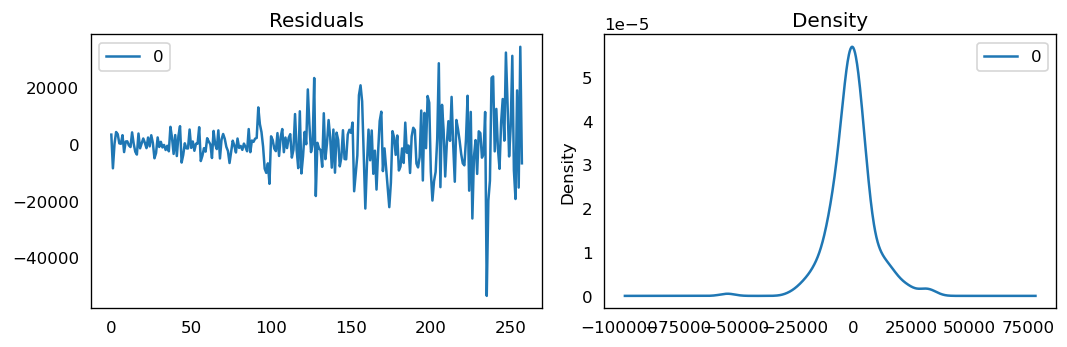

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_optimised_InterestRate.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()
plt.show()

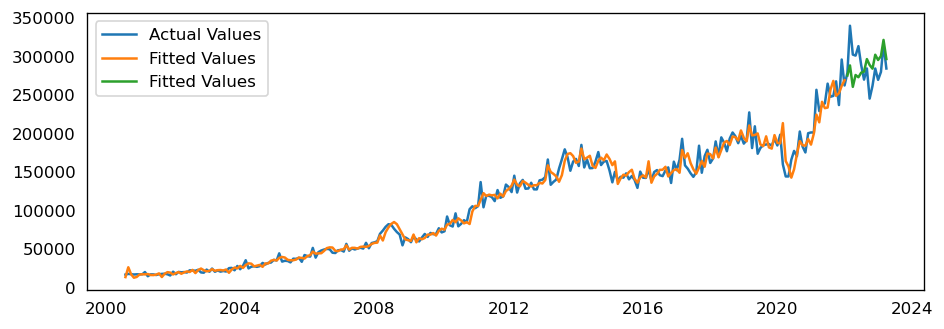

In [ ]:
actual_values2 = df_new["Exports_Total"]
fitted_values2 = model_optimised_InterestRate.predict()
forecast = model_optimised_InterestRate.forecast(steps=df_test.shape[0], exog=df_test['Actual'])

appended_forecast = pd.concat([fitted_values2, forecast], ignore_index=True)

# Plot the actual and fitted values
plt.plot(df_new['Year'],actual_values2, label='Actual Values')
plt.plot(df_train['Year'],fitted_values2, label='Fitted Values')
plt.plot(df_test['Year'],forecast, label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
actual2=np.array(actual_values2)
forecast2=np.array(appended_forecast)

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast2, actual2)

{'mape': 0.07084345323826428,
 'me': 223.3876198884921,
 'mae': 7406.729476157458,
 'mpe': 0.007923902593311756,
 'rmse': 11278.52082569991,
 'acf1': 0.22942203634989453,
 'corr': 0.98961543415826,
 'minmax': 0.06630780093099709}

### As seen from the model, SARIMAX(2,1,1,12) with Interest Rate as exogenous variable is almost equal model to forecast Interest Rate of India for the next decade with an accuracy of 93% in comparison to 93% accuracy of SARIMA model

## Model 6: LSTM model

In Deep Learning, Recurrent Neural Networks (RNN) are a family of neural networks that excels in learning from sequential data. A class of RNN that has found practical applications is Long Short-Term Memory (LSTM) because it is robust against the problems of long-term dependency.

![RNN vs LSTM](RNN%20vs%20LSTM.png)

### Model Building

Epoch 1/200
4/4 [==============================] - 3s 191ms/step - loss: 0.0485 - val_loss: 0.3007 - lr: 0.0010
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0386 - val_loss: 0.2473 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0294 - val_loss: 0.1934 - lr: 0.0010
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0217 - val_loss: 0.1386 - lr: 0.0010
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0146 - val_loss: 0.0854 - lr: 0.0010
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0091 - val_loss: 0.0415 - lr: 0.0010
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0062 - val_loss: 0.0153 - lr: 0.0010
Epoch 8/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0054 - val_loss: 0.0064 - lr: 0.0010
Epoch 9/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0054 - val_loss: 0.0053 - lr: 0.0010


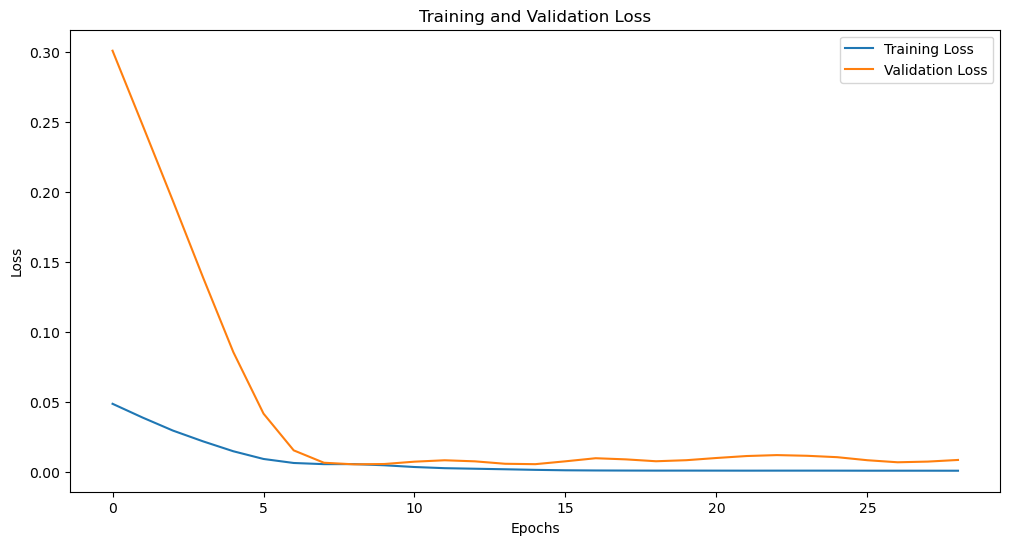

4/4 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv("Import_Export_Monthly.csv")

# Extract and normalize the 'Exports_Total' column
scaler = MinMaxScaler()
exports = scaler.fit_transform(data['Exports_Total'].values.reshape(-1, 1))

# Define a function to create input sequences and targets
def create_sequences(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Define hyperparameters
look_back = 12
num_lstm_units = 64
num_epochs = 200
batch_size = 64

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv("Import_Export_Monthly.csv")

# Extract and normalize the 'Exports_Total' column
scaler = MinMaxScaler()
exports = scaler.fit_transform(data['Exports_Total'].values.reshape(-1, 1))

# Define a function to create input sequences and targets
def create_sequences(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Define hyperparameters
look_back = 12
num_lstm_units = 64
num_epochs = 200
batch_size = 64

# Create sequences and split data into training and testing sets
X, Y = create_sequences(exports, look_back)
train_size = int(len(X) * 0.67)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create a more complex LSTM model
model = Sequential()
model.add(LSTM(num_lstm_units, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(num_lstm_units))
model.add(Dense(1))

# Compile the model with a custom learning rate
custom_optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

# Implement early stopping and learning rate scheduling
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
def lr_scheduler(epoch, lr):
    if epoch % 50 == 0 and epoch > 0:
        return lr * 0.5
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

# Train the model
history = model.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(X_test, Y_test), callbacks=[early_stopping, lr_schedule])

# Visualize training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate MAPE (Mean Absolute Percentage Error)
train_mape = mean_absolute_percentage_error(Y_train[0], train_predict[:, 0])
test_mape = mean_absolute_percentage_error(Y_test[0], test_predict[:, 0])

# Define years based on your data (adjust this part)
years = data['Year'].values[-len(X_test):]



### LSTM Model Comparison with actual

In [ ]:
# Define years based on your data (adjust this part)
years = data['Year'].values[-len(X_test):]

# Create a Plotly figure
import plotly.graph_objects as go
fig = go.Figure()

# Add traces for actual and predicted data
fig.add_trace(go.Scatter(x=years, y=Y_test[0], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=years, y=test_predict[:, 0], mode='lines', name='Predicted'))

# Customize the layout
fig.update_layout(
    title='Actual vs. Predicted Exports',
    xaxis_title='Year',
    yaxis_title='Exports_Total',
    xaxis=dict(tickangle=45, tickfont=dict(size=10)),
)

# Add accuracy to the plot as text annotations
fig.add_annotation(
    x=years[0],  # X-coordinate for the annotation (adjust as needed)
    y=max(Y_test[0]),  # Y-coordinate for the annotation (adjust as needed)
    text=f'Test MAPE: {test_mape:.2f}%',  # Display the test MAPE
    showarrow=False,  # No arrow for the annotation
    font=dict(size=12),  # Adjust font size as needed
)

# Show the interactive plot
fig.show()

print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")


Train MAPE: 0.88%
Test MAPE: 0.09%


### Model accuracy evaluation

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import acf  # Import acf from statsmodels

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)  # ME
    mae = np.mean(np.abs(forecast - actual))  # MAE
    mpe = np.mean((forecast - actual) / actual)  # MPE
    rmse = np.mean((forecast - actual) ** 2) ** 0.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]  # Correlation
    mins = np.amin(np.hstack([forecast[:, None], actual[:, None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:, None], actual[:, None]]), axis=1)
    minmax = 1 - np.mean(mins / maxs)  # Min-Max
    acf1 = acf(forecast - actual)[1]  # ACF1
    return {
        'mape': mape, 'me': me, 'mae': mae,
        'mpe': mpe, 'rmse': rmse, 'acf1': acf1,
        'corr': corr, 'minmax': minmax
    }

# Calculate forecast accuracy
accuracy_metrics = forecast_accuracy(test_predict[:, 0], Y_test[0])
# Calculate forecast accuracy
accuracy_metrics = forecast_accuracy(test_predict[:, 0], Y_test[0])

# Print accuracy metrics in separate lines
print("MAPE:", accuracy_metrics['mape'])
print("ME:", accuracy_metrics['me'])
print("MAE:", accuracy_metrics['mae'])
print("MPE:", accuracy_metrics['mpe'])
print("RMSE:", accuracy_metrics['rmse'])
print("ACF1:", accuracy_metrics['acf1'])
print("Correlation:", accuracy_metrics['corr'])
print("Min-Max:", accuracy_metrics['minmax'])

MAPE: 0.09475707400076715
ME: -411.3392187500009
MAE: 18546.04828125
MPE: 0.01690895173675607
RMSE: 24009.75194088294
ACF1: 0.5889824060915498
Correlation: 0.8908920310366191
Min-Max: 0.08758221501943553


### SARIMA and SARIMAX(2,1,1,12) with Interest Rate as exogenous variable performed better with an accuracy of ~94% compared to 91% with LSTM